# **Predicting Perth Property Prices: A Data-Driven Journey into Smart property Investment Decisions**

*The project aims to develop a predictive model that provides estimates for property prices based on various influential factors. 
The insights from this project aim to facilitate informed decision-making in property investment and sales within the region.*

*Prepared by :* **Faris Arief Mawardi**

## **I. Introduction**

==========================================================

Dataset : perth_houses.csv

Dataset Source : [Kaggle](https://www.kaggle.com/datasets/syuzai/perth-house-prices)

Objectives :

Develop a model to predict property prices in the Perth area aims to provide valuable insights into the factors influencing property values within the region.

==========================================================

**Defining Problem Statements**

- **Specific**: This research focuses on developing a property price prediction model in the Perth region, Western Australia.
- **Measurable**: The objective of this research is to produce a property price prediction model that can estimate the value of properties located in Perth, Australia.
- **Achievable**: Leveraging historical property data and machine learning techniques, this project aims to predict property prices.
- **Relevant**: The research will assist stakeholders in the property industry to make informed decisions for optimizing their property investments in the Perth region.
- **Time-bound**: The research will concentrate on recent years' data, with a specified timeframe to complete the project.

**Problem Statement:**

In the property industry, accurate property valuation is crucial for intelligent decision-making. Therefore, this project aims to develop a property price prediction model that can estimate property values in Perth, Western Australia. The primary goal of this research is to enable stakeholders in the property industry to make more informed decisions for maximizing property investment value in the Perth region through accurate property price predictions.

**Breaking Down the Problems**

- **What:** What are the factors influencing property prices in Perth?
- **When:** Can the year of property construction and the most recent year of property sale affect property prices in Perth?
- **Where:** Can the location of a property influence its price in Perth?
- **How:** How will the property price prediction model in Perth be developed?

**Project Workflow**

1. **Preparing Required Data:**
    - Identifying relevant attributes to predict property prices in the Perth region, such as the number of bedrooms, bathrooms, land area, building area, construction year, distance to the city center, nearest train station, and nearest school.

2. **Exploratory Data Analysis**
    - Initial Data Understandings
    - Identifying missing values and Outliers
    - Conducting descriptive statistics analytic for relevant property attributes.

3. **Data Preprocessing:**
    - Correlation tests to determine relationships between property attributes and prices.
    - Calculating correlations to determine the significant features that affect the diverse property prices in Perth
    - Handling Missing Values and Outliers
    - Features Scaling and Encoding

4. **Machine Learning Application:**
    - Implementing supervised machine learning regression methods to predict property prices.
    - Evaluating the performance of the machine learning model.
    - Conducting inferential tests to ascertain the accuracy of property price predictions.

5. **Drawing Conclusions and Development Suggestions**

# II. Import Libraries
*In this section, all the necessary libraries, packages, and modules required to run this project will be imported.*

In [175]:
# Import Scikit-Learn library for developing property price prediction model
import sklearn
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis  # Import Skew and Kurtosis from scipy stats for skewness and kurtosis analysis

# Import Pandas library for data manipulation
import pandas as pd

# Import NumPy library for numerical computation
import numpy as np

# Import Matplotlib and Seaborn libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import kendalltau library for correlation analysis
from scipy.stats import kendalltau
from sklearn.impute import KNNImputer #Import library KNN imputer
import phik  # Importing phik for correlation analysis on categorical/object data types
from phik import phik_matrix  # To compute Phi K correlation matrix
from phik.report import plot_correlation_matrix  # To create visualization of correlation matrix
from phik import report  # To provide additional reporting and analysis to explore relationships between variables in the dataset that are categorical in nature

from feature_engine.outliers import Winsorizer  # For handling outliers
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import OneHotEncoder  # For feature encoding
from statsmodels.stats.outliers_influence import variance_inflation_factor  # To compute VIF

from sklearn.decomposition import PCA  # To handle multidimensionality reduction in data

import time  # Importing time module to measure execution time
from sklearn.compose import make_column_transformer  # To create a column transformer
import pickle  # Import pickle for use in serializing and deserializing Python objects
import json  # Import json used for working with data in JSON format. JSON is a text format used for data exchange between applications and is very common in software development.

# Import required libraries for model definition
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from time import time

import plotly.express as px
from sklearn.pipeline import make_pipeline  # To create a data processing pipeline

# Model Evaluation
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

from sklearn.model_selection import GridSearchCV  # For model parameter tuning

# III. Data Loading
*In this section, the dataset to be used will be loaded into the notebook for further analysis.*

In [2]:
data = pd.read_csv('perth_houses.csv') # Loading data from csv file

data # Displaying the dataset in dataframe format

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

# IV. Exploratory Data Analysis

*Conducting exploratory data analysis to inspect and understand the dataset.*

**4.1 Initial Dataset Understanding**

In [3]:
# Displaying the Datas in the form of Dataframe
data

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

In [4]:
# Displaying the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [5]:
# Checking unique values in attributes within the dataset
columns = data.columns

for column in columns:
    unique_vals = data[column].unique()  # Initializing a list of unique values for each column in numeric_columns
    print(f"unique values in '{column}' : {unique_vals}")  # Displaying the obtained list
    print(len(unique_vals))  # Counting the number of unique values in each column

unique values in 'ADDRESS' : ['1 Acorn Place' '1 Addis Way' '1 Ainsley Court' ... '9D Pycombe Way'
 '9D Shalford Way' '9E Margaret Street']
33566
unique values in 'SUBURB' : ['South Lake' 'Wandi' 'Camillo' 'Bellevue' 'Lockridge' 'Mount Richon'
 'Hilbert' 'Waikiki' 'Hamersley' 'Bayswater' 'Carmel' 'Butler' 'Balga'
 'Hammond Park' 'Wattle Grove' 'Bull Creek' 'Bullsbrook' 'Maida Vale'
 'Koongamia' 'Mount Nasura' 'Forrestdale' 'Atwell' 'Ashby' 'Woodbridge'
 'Bicton' 'Singleton' 'South Guildford' 'Armadale' 'Kenwick'
 'Hamilton Hill' 'Port Kennedy' 'Roleystone' 'Glen Forrest'
 'Secret Harbour' 'Herne Hill' 'Gwelup' 'Harrisdale' 'North Fremantle'
 'Quinns Rocks' 'Spearwood' 'Parkwood' 'Tapping' 'Thornlie' 'Baldivis'
 'Kensington' 'Kiara' 'Menora' 'Southern River' 'Bibra Lake' 'Swanbourne'
 'The Vines' 'Stratton' 'North Beach' 'Haynes' 'Madeley' 'Wembley Downs'
 'Bentley' 'Manning' 'Warwick' 'Queens Park' 'Medina' 'Kalamunda'
 'Merriwa' 'Aubin Grove' 'Karrinyup' 'Gooseberry Hill' 'Darch' 'Hil

**Insights :**

The dataset used in this study comprises property data from the Perth area, Western Australia. This dataset includes various attributes associated with properties, such as the number of bedrooms, bathrooms, land size, floor area, build year, distance to the city center, proximity to the nearest train station and school, property price, and more. The dataset consists of 33,656 entries and 19 columns (attributes).

**Relevance to the Research Objectives:**

1. **Building a Model to Predict Property Prices in the Perth Area:** This dataset serves as the foundation for developing a property price prediction model. Relevant attributes like the number of bedrooms, land size, among others, will be used as features to train the model. Property price will be the target variable to predict.
  
2. **Analyzing Factors Influencing Property Prices:** The dataset encompasses various attributes that can serve as factors influencing property prices. For instance, analyzing the extent to which the number of bedrooms or build year impacts property prices can help identify the most significant attributes affecting property prices in the Perth area.

**Dataset Attribute Information:**

The dataset consists of 19 columns, and here is a brief explanation of each column:
1. **ADDRESS**: Property address, indicating the physical address of the property in the Perth area.
2. **SUBURB**: Suburb or area in the Perth region where the property is located.
3. **PRICE**: Property price, which is the target variable to be predicted by the model.
4. **BEDROOMS**: Number of bedrooms in the property.
5. **BATHROOMS**: Number of bathrooms in the property.
6. **GARAGE**: Number of garages/vehicle capacity that can be accommodated in the garage.
7. **LAND_AREA**: Land area of the property in square meters.
8. **FLOOR_AREA**: Floor area of the property in square meters.
9. **BUILD_YEAR**: Year of property construction.
10. **CBD_DIST**: Distance of the property to the Central Business District in meters (assumed).
11. **NEAREST_STN**: Name of the nearest train station from the property.
12. **NEAREST_STN_DIST**: Distance of the property to the nearest train station in meters (assumed).
13. **DATE_SOLD**: Date of property sale.
14. **POSTCODE**: Property area postcode.
15. **LATITUDE**: Latitude coordinates of the property.
16. **LONGITUDE**: Longitude coordinates of the property.
17. **NEAREST_SCH**: Name of the nearest school from the property.
18. **NEAREST_SCH_DIST**: Distance of the property to the nearest school in meters (assumed).
19. **NEAREST_SCH_RANK**: Rank of the nearest school.

**Data Modifications**

1. **BUILD_YEAR**: This column needs to be converted to numeric data type (integer) to facilitate analysis of the impact of the property's build year on its price.
2. **DATE_SOLD**: This column needs to be converted to a datetime data type.

Apart from these two columns, the remaining columns are already in the appropriate data format.

**4.1.1 Data Type Conversion of Dataset Features**

**Converting Data Types in the "Date_Sold" Column**

In [6]:
# Removing extra character "\r" in the "Date_Sold" feature
data['DATE_SOLD'] = data['DATE_SOLD'].str.replace('\r','')
data['DATE_SOLD'].unique() # Displaying unique values of the date sold feature to ensure the extra character has been successfully removed

array(['09-2018', '02-2019', '06-2015', '07-2018', '11-2016', '03-2013',
       '05-2016', '03-2019', '06-2020', '10-2019', '07-2014', '11-2018',
       '12-2019', '07-2019', '05-2018', '11-2017', '10-2020', '05-2013',
       '08-2017', '04-2017', '08-2014', '09-2014', '04-2013', '10-2018',
       '01-2015', '08-2018', '04-2018', '12-2020', '10-2017', '08-2015',
       '09-2019', '08-2013', '06-2016', '11-2020', '12-2018', '03-2018',
       '03-2016', '05-2020', '10-2013', '12-2016', '03-2020', '08-2016',
       '07-2017', '02-2018', '07-2015', '08-2020', '10-1998', '06-2017',
       '11-2019', '06-2019', '08-2019', '01-2019', '12-2008', '04-2015',
       '04-2019', '02-2016', '06-2012', '03-2017', '02-2017', '01-2016',
       '01-2020', '04-2016', '02-2013', '09-2017', '09-2009', '10-2014',
       '01-2014', '09-2016', '02-2014', '12-2017', '01-2017', '09-2015',
       '07-2016', '05-2015', '05-2019', '02-2020', '01-2018', '09-2020',
       '02-2015', '12-1998', '07-2020', '06-1995', 

In [7]:
data['DATE_SOLD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33656 entries, 0 to 33655
Series name: DATE_SOLD
Non-Null Count  Dtype 
--------------  ----- 
33656 non-null  object
dtypes: object(1)
memory usage: 263.1+ KB


The removal of the extra characters is successful. Next, we will change its data types (object -> datetime).

In [8]:
# Converting the DATE_SOLD column to datetime data type
data['DATE_SOLD'] = pd.to_datetime(data['DATE_SOLD'])

# Extracting the year of sale and converting it to integer
data['DATE_SOLD'] = data['DATE_SOLD'].dt.year

# Checking the data type of the modified DATE_SOLD column
data['DATE_SOLD'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 33656 entries, 0 to 33655
Series name: DATE_SOLD
Non-Null Count  Dtype
--------------  -----
33656 non-null  int32
dtypes: int32(1)
memory usage: 131.6 KB


C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_18556\3387952330.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE_SOLD'] = pd.to_datetime(data['DATE_SOLD'])


The data type conversion for the 'DATE_SOLD' column has been successfully performed (object -> integer).

In [9]:
data # Rechecking the datas

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800       2018      6164   
1               Kwinana Station              4900       2019      6167   
2               Challis Station              1900       2015      6111   
3               Midland Station              3600       2018      6056   
4            Bassendean Station              2000       2016      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500       2016      6162   
33652          Stirling Station              4600       2017      6061   
33653          Stirling Station              4600       2017      6061   
33654           Warwick Station              4400       2016      6064   
33655           Midland Station              1700       2016      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

**4.2 Missing Values Analysis**

*In this section, we will attempt to identify any missing values in this dataset, and if present, determine their count and percentage. The anticipated insight from this analysis is to provide an overview of the existing missing values and recommend appropriate steps to handle these missing values.*

In [10]:
missing = data.isnull().sum() # Initializing the variable 'missing' to calculate the count of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100 # Initializing the percentage of missing values in the dataset
info_missing = pd.DataFrame({'Missing Value Count': missing, 'Missing Value Percentage': missing_percentage}) # Initializing the variable to display the count and percentage of missing values per feature in the dataset
info_missing # Displaying the result of the missing values calculation in a dataframe format

Missing Value Count  Missing Value Percentage
ADDRESS                             0                  0.000000
SUBURB                              0                  0.000000
PRICE                               0                  0.000000
BEDROOMS                            0                  0.000000
BATHROOMS                           0                  0.000000
GARAGE                           2478                  7.362729
LAND_AREA                           0                  0.000000
FLOOR_AREA                          0                  0.000000
BUILD_YEAR                       3155                  9.374257
CBD_DIST                            0                  0.000000
NEAREST_STN                         0                  0.000000
NEAREST_STN_DIST                    0                  0.000000
DATE_SOLD                           0                  0.000000
POSTCODE                            0                  0.000000
LATITUDE                            0                  0.000000
LONGITUDE                           0                  0.000000
NEAREST_SCH                         0                  0.000000
NEAREST_SCH_DIST                    0                  0.000000
NEAREST_SCH_RANK                10952                 32.541003

In [12]:
# Displaying rows containing missing values in the 'GARAGE' column
missing_garage = data[data['GARAGE'].isnull()]
missing_garage

ADDRESS         SUBURB   PRICE  BEDROOMS  BATHROOMS  \
58               1 Bristow Street         Haynes  177000         3          1   
66                1 Cabarita Road      Kalamunda  605000         2          1   
81                  1 Caxton Lane      Ballajura  392500         4          2   
125                   1 Dean Road        Bateman  599900         3          1   
135                 1 Dolphin Way         Beldon  400000         3          1   
...                           ...            ...     ...       ...        ...   
33558            99 Edmund Street      Fremantle  755000         3          2   
33566   99 Joseph Banks Boulevard  Banksia Grove  290000         2          2   
33568         99 Keehner Entrance         Martin  279000         4          1   
33582  992 Great Northern Highway      Millendon  610000         4          2   
33621            9A Meyrick Court     Currambine  375000         3          2   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
58        NaN        412         150      2015.0     26200   
66        NaN       2578         180      1977.0     18200   
81        NaN        532         185         NaN     12300   
125       NaN        807         126      1968.0     10600   
135       NaN        683          86      1978.0     22300   
...       ...        ...         ...         ...       ...   
33558     NaN        612         112      1900.0     15300   
33566     NaN        220         109      2014.0     28700   
33568     NaN        603         225      2015.0     19900   
33582     NaN       2500         210      1985.0     22500   
33621     NaN        448         122      1992.0     25600   

              NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE  \
58       Armadale Station              2400       2013      6112 -32.159374   
66                Madding              9200       2020      6076 -31.987050   
81      Bayswater Station              7800       2019      6066 -31.848738   
125    Bull Creek Station               888       2017      6150 -32.046400   
135     Edgewater Station              2100       2016      6027 -31.771750   
...                   ...               ...        ...       ...        ...   
33558   Fremantle Station              1900       2018      6160 -32.062127   
33566    Clarkson Station              5800       2017      6031 -31.700113   
33568    Seaforth Station              1200       2014      6110 -32.073115   
33582     Midland Station              9800       2012      6056 -31.805850   
33621  Currambine Station              1900       2020      6028 -31.741890   

        LONGITUDE                            NEAREST_SCH  NEAREST_SCH_DIST  \
58     115.988082                  DALE CHRISTIAN SCHOOL          1.003240   
66     116.047690                    ST BRIGID'S COLLEGE          1.142802   
81     115.904503            BALLAJURA COMMUNITY COLLEGE          1.136161   
125    115.844770                 CORPUS CHRISTI COLLEGE          1.191641   
135    115.756300             BELRIDGE SECONDARY COLLEGE          0.667724   
...           ...                                    ...               ...   
33558  115.761187                      FREMANTLE COLLEGE          0.907582   
33566  115.798718         JOSEPH BANKS SECONDARY COLLEGE          0.257212   
33568  116.013322                  LUMEN CHRISTI COLLEGE          0.650258   
33582  116.020490  SWAN VALLEY ANGLICAN COMMUNITY SCHOOL          3.550914   
33621  115.748020         LAKE JOONDALUP BAPTIST COLLEGE          1.359426   

       NEAREST_SCH_RANK  
58                  NaN  
66                 99.0  
81                133.0  
125                28.0  
135               102.0  
...                 ...  
33558             128.0  
33566              92.0  
33568             122.0  
33582              53.0  
33621              80.0  

[2478 rows x 19 columns]

In [13]:
# Displaying rows containing missing values in the 'BUILD_YEAR' column
missing_buildyear = data[data['BUILD_YEAR'].isnull()]
missing_buildyear

ADDRESS           SUBURB   PRICE  BEDROOMS  BATHROOMS  \
27          1 Beenan Elbow  South Guildford  347500         3          1   
33        1 Belvedere Rise       Roleystone  795000         4          3   
63          1 Buckie Court          Warwick  650000         4          2   
81           1 Caxton Lane        Ballajura  392500         4          2   
82        1 Centaur Circle       Woodbridge  900000         4          2   
...                    ...              ...     ...       ...        ...   
33630     9a Sydenham Road       Doubleview  990000         4          2   
33641  9B Leichardt Street         St James  495000         5          1   
33652       9C Pycombe Way      Westminster  410000         3          2   
33653       9D Pycombe Way      Westminster  427000         3          2   
33655   9E Margaret Street          Midland  295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
27        3.0        452          88         NaN     13100   
33        6.0       2095         254         NaN     27300   
63        1.0        715         170         NaN     13900   
81        NaN        532         185         NaN     12300   
82        2.0        454         263         NaN     14700   
...       ...        ...         ...         ...       ...   
33630     2.0        327         311         NaN      9100   
33641     1.0        971         130         NaN      6900   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33655     2.0        296          95         NaN     16700   

                  NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
27     East Guildford Station              1400       2018      6055   
33          Kelmscott Station              5800       2017      6111   
63            Warwick Station               627       2014      6024   
81          Bayswater Station              7800       2019      6066   
82            Midland Station               343       2008      6056   
...                       ...               ...        ...       ...   
33630        Stirling Station              1900       2018      6018   
33641       Welshpool Station              1100       2020      6102   
33652        Stirling Station              4600       2017      6061   
33653        Stirling Station              4600       2017      6061   
33655         Midland Station              1700       2016      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
27    -31.906980  115.986980                     GUILDFORD GRAMMAR SCHOOL   
33    -32.115357  116.074862                 KELMSCOTT SENIOR HIGH SCHOOL   
63    -31.839080  115.796470                            GREENWOOD COLLEGE   
81    -31.848738  115.904503                  BALLAJURA COMMUNITY COLLEGE   
82    -31.893400  115.998000               YOUTH FUTURES COMMUNITY SCHOOL   
...          ...         ...                                          ...   
33630 -31.899212  115.785637    INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA   
33641 -31.995070  115.911720               KENT STREET SENIOR HIGH SCHOOL   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
27             1.517811              52.0  
33             6.049554             113.0  
63             1.500366              86.0  
81             1.136161             133.0  
82             0.831019               NaN  
...                 ...               ...  
33630          0.761199               NaN  
33641          2.078063              93.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33655          1.055564              53.0  

[3155 rows x 19 columns]

In [14]:
# Displaying rows that contain missing values in the 'NEAREST_SCH_RANK' column
missing_schoolrank = data[data['NEAREST_SCH_RANK'].isnull()]
missing_schoolrank

ADDRESS        SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0            1 Acorn Place    South Lake  565000         4          2     2.0   
3          1 Albert Street      Bellevue  255000         2          1     2.0   
4             1 Aman Place     Lockridge  325000         4          1     2.0   
5      1 Amethyst Crescent  Mount Richon  409000         4          2     1.0   
6            1 Ardara Lane       Hilbert  400000         3          2     2.0   
...                    ...           ...     ...       ...        ...     ...   
33629       9A Simeon Rise      Pearsall  422500         4          2     2.0   
33630     9a Sydenham Road    Doubleview  990000         4          2     2.0   
33642    9B Longfield Road    Maddington  240000         3          1     1.0   
33647      9B Shalford Way    Girrawheen  245000         3          1     4.0   
33654      9D Shalford Way    Girrawheen  295000         3          1     2.0   

       LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0            600         160      2003.0     18300  Cockburn Central Station   
3            651          59      1953.0     17900           Midland Station   
4            466         131      1998.0     11200        Bassendean Station   
5            759         118      1991.0     27300          Armadale Station   
6            386         132      2014.0     28200          Armadale Station   
...          ...         ...         ...       ...                       ...   
33629        724         140      2005.0     19100         Whitfords Station   
33630        327         311         NaN      9100          Stirling Station   
33642        480         112      1978.0     16800                   Madding   
33647        381          85      1974.0     12600           Warwick Station   
33654        457          85      1974.0     12600           Warwick Station   

       NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0                  1800       2018      6164 -32.115900  115.842450   
3                  3600       2018      6056 -31.900547  116.038009   
4                  2000       2016      6054 -31.885790  115.947780   
5                  1000       2013      6112 -32.153801  116.023658   
6                  3700       2016      6112 -32.179978  115.988647   
...                 ...        ...       ...        ...         ...   
33629              3800       2020      6065 -31.784276  115.818178   
33630              1900       2018      6018 -31.899212  115.785637   
33642               917       2019      6109 -32.051950  115.991790   
33647              4400       2018      6064 -31.839680  115.842410   
33654              4400       2016      6064 -31.839680  115.842410   

                                     NEAREST_SCH  NEAREST_SCH_DIST  \
0                    LAKELAND SENIOR HIGH SCHOOL          0.828339   
3                   SWAN VIEW SENIOR HIGH SCHOOL          1.571401   
4                                  KIARA COLLEGE          1.514922   
5                    ARMADALE SENIOR HIGH SCHOOL          1.227219   
6                          DALE CHRISTIAN SCHOOL          2.485731   
...                                          ...               ...   
33629                                     ALTA-1          0.475902   
33630  INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA          0.761199   
33642                         ST FRANCIS' SCHOOL          0.958426   
33647              GIRRAWHEEN SENIOR HIGH SCHOOL          0.358494   
33654              GIRRAWHEEN SENIOR HIGH SCHOOL          0.358494   

       NEAREST_SCH_RANK  
0                   NaN  
3                   NaN  
4                   NaN  
5                   NaN  
6                   NaN  
...                 ...  
33629               NaN  
33630               NaN  
33642               NaN  
33647               NaN  
33654               NaN  

[10952 rows x 19 columns]

**Insights :**

1. **GARAGE:** There are 2478 (approximately 7.36%) missing values in this column. These missing values could be due to some properties not having a garage (Missing Not At Random) -> Missing values can be considered as "0" or indicating no garage.
   
2. **BUILD_YEAR:** There are 3155 (approximately 9.37%) missing values in this column. This suggests that some properties might lack information about the year of construction. In this case, we could consider filling missing values with methods such as the mean, mode of the construction year, or even using KNN imputer or iterative imputer.

3. **NEAREST_SCH_RANK:** There are 10952 (approximately 32.54%) missing values in this column. This indicates that most properties don't have information about the nearest school rank. Filling missing values in this column might not be adequate, and the best option might be to consider whether this column is necessary for analysis. If not required, the column could be dropped.

Appropriate handling of missing values depends on each column:

- For the **GARAGE** column, we can fill missing values with a "0".
- For the **BUILD_YEAR** column, we could consider filling missing values using a KNN imputer or iterative imputer.
- For the **NEAREST_SCH_RANK** column, we will first consider whether it's truly necessary for analysis. If not, we may drop the column. If it's important, we'll perform imputation with the KNN imputer.

**4.3 Data Distribution Analysis**

*In this section, we will conduct the data distribution analysis of the features present in the dataset.*

**4.3.1 Descriptive Statistics Distribution Analysis**

In [11]:
# Descriptive Statistics Analysis of the Dataset
data.describe().T

count           mean            std           min  \
PRICE             33656.0  637072.005794  355825.632737  51000.000000   
BEDROOMS          33656.0       3.659110       0.752038      1.000000   
BATHROOMS         33656.0       1.823063       0.587427      1.000000   
GARAGE            31178.0       2.199917       1.365225      1.000000   
LAND_AREA         33656.0    2740.644016   16693.513215     61.000000   
FLOOR_AREA        33656.0     183.501545      72.102982      1.000000   
BUILD_YEAR        30501.0    1989.706436      20.964330   1868.000000   
CBD_DIST          33656.0   19777.374465   11364.415413    681.000000   
NEAREST_STN_DIST  33656.0    4523.371494    4495.064024     46.000000   
DATE_SOLD         33656.0    2016.621019       3.505477   1988.000000   
POSTCODE          33656.0    6089.420074      62.167921   6003.000000   
LATITUDE          33656.0     -31.960664       0.177780    -32.472979   
LONGITUDE         33656.0     115.879265       0.118137    115.582730   
NEAREST_SCH_DIST  33656.0       1.815268       1.746000      0.070912   
NEAREST_SCH_RANK  22704.0      72.672569      40.639795      1.000000   

                            25%            50%            75%           max  
PRICE             410000.000000  535500.000000  760000.000000  2.440000e+06  
BEDROOMS               3.000000       4.000000       4.000000  1.000000e+01  
BATHROOMS              1.000000       2.000000       2.000000  1.600000e+01  
GARAGE                 2.000000       2.000000       2.000000  9.900000e+01  
LAND_AREA            503.000000     682.000000     838.000000  9.999990e+05  
FLOOR_AREA           130.000000     172.000000     222.250000  8.700000e+02  
BUILD_YEAR          1978.000000    1995.000000    2005.000000  2.017000e+03  
CBD_DIST           11200.000000   17500.000000   26600.000000  5.980000e+04  
NEAREST_STN_DIST    1800.000000    3200.000000    5300.000000  3.550000e+04  
DATE_SOLD           2015.000000    2017.000000    2019.000000  2.020000e+03  
POSTCODE            6050.000000    6069.000000    6150.000000  6.558000e+03  
LATITUDE             -32.068437     -31.933231     -31.843818 -3.145745e+01  
LONGITUDE            115.789763     115.854198     115.970722  1.163432e+02  
NEAREST_SCH_DIST       0.880568       1.345520       2.097225  2.325437e+01  
NEAREST_SCH_RANK      39.000000      68.000000     105.000000  1.390000e+02

In [12]:
# Filter the columns to be analyzed -> numerical features 
numeric_features = data.select_dtypes(include=np.number)
# Calculate skewness and kurtosis for numerical columns
skewness = numeric_features.skew()
kurtosis = numeric_features.kurtosis()

# Create a DataFrame 'summary' containing skewness and kurtosis values for each numerical column
skewkurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skewkurt

Skewness     Kurtosis
PRICE              1.783086     3.969414
BEDROOMS           0.245344     2.171152
BATHROOMS          0.861960    12.129895
GARAGE            16.282811   892.239407
LAND_AREA         33.760784  1677.830424
FLOOR_AREA         1.375895     4.416178
BUILD_YEAR        -1.387791     2.245408
CBD_DIST           0.885321     0.403536
NEAREST_STN_DIST   2.446341     7.425705
DATE_SOLD         -2.714884    11.828339
POSTCODE           2.066723    12.769061
LATITUDE          -0.376034    -0.106053
LONGITUDE          0.634683     0.045011
NEAREST_SCH_DIST   3.749411    20.032750
NEAREST_SCH_RANK   0.037912    -1.217724

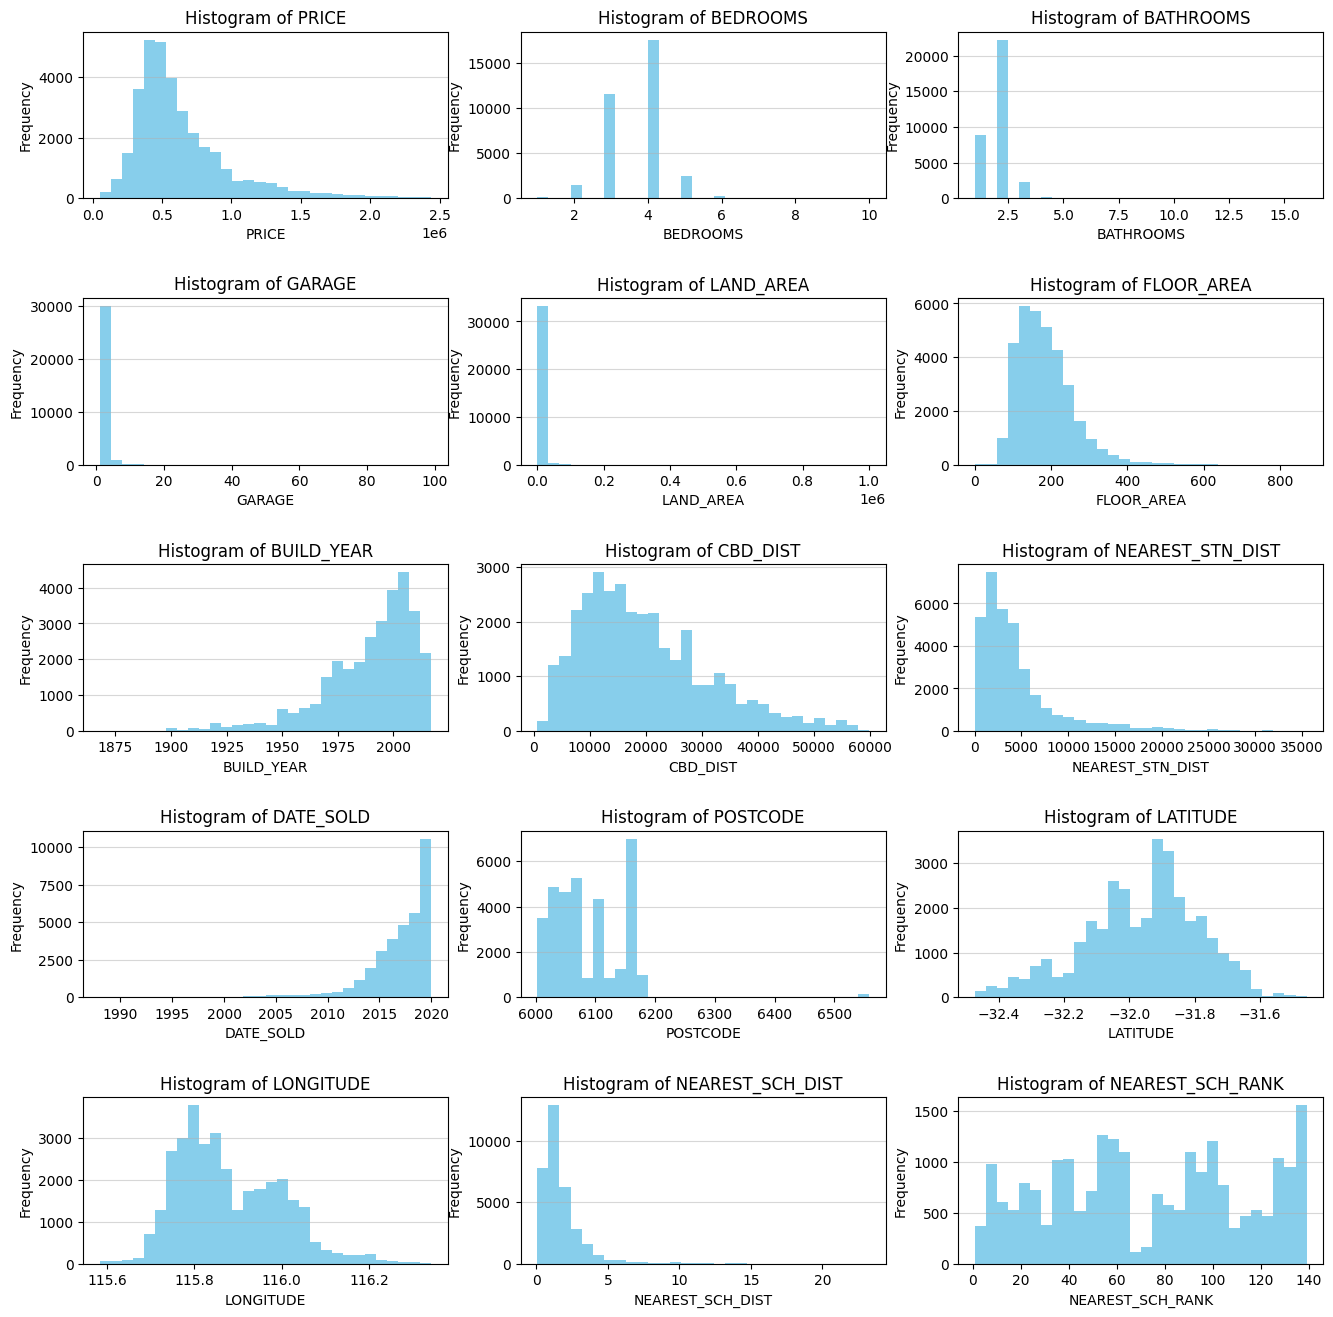

In [13]:
# Create histogram subplots for each numeric column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=0.6)

axes = axes.flatten()

# Iterate over each column in the skewkurt DataFrame
for i, column in enumerate(skewkurt.index):
    ax = axes[i]
    ax.hist(data[column], bins=30, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.5)

for i in range(len(skewkurt.index), len(axes)):
    fig.delaxes(axes[i])

plt.show()

**Insights :**

From the descriptive statistical analysis, skewness, kurtosis, and visualization of data distribution, the following insights can be drawn:

1. The "PRICE" column shows a right-skewed (positively skewed) data distribution with a skewness around 1.78, indicating the presence of houses with significantly high prices.
2. The "BEDROOMS" column has a more even distribution with a mean around 3.66 and skewness approaching 0, indicating that the number of bedrooms in houses is more evenly distributed.
3. The "BATHROOMS" column also has a more even distribution with skewness close to 0, suggesting that the number of bathrooms in houses tends to be evenly distributed.
4. The "GARAGE" column has very high skewness, approximately 16.28, indicating the presence of many outliers with an extremely high number of garages.
5. The "LAND_AREA" column has a data distribution with a mean around 2740.64 and skewness around 33.76, suggesting the presence of some houses with very large land areas.
6. The "FLOOR_AREA" column has a more even data distribution with skewness approaching 0 (1.35), suggesting that the floor area of houses is relatively evenly distributed.
7. The "BUILD_YEAR" column has negative skewness, around -1.39, indicating the presence of some older construction years.
8. The "CBD_DIST" column has a skewness of about 0.88, indicating a more even data distribution for the distance towards the city center.
9. The "NEAREST_STN_DIST" column has a skewness around 2.45, indicating the presence of some very distant distances to stations.
10. The "POSTCODE" column has a skewness around 2.07, indicating the presence of some postal codes far from the average.
11. The "LATITUDE" column has skewness around -0.38 and kurtosis around -0.11, indicating a tendency toward symmetrical distribution.
12. The "LONGITUDE" column has skewness around 0.63 and kurtosis around 0.05, suggesting a tendency toward symmetrical distribution.
13. The "NEAREST_SCH_DIST" column has skewness around 3.75 and kurtosis around 20.03, indicating some very distant distances to schools.
14. The "NEAREST_SCH_RANK" column has skewness around 0.04 and kurtosis around -1.22, indicating a relatively symmetrical distribution.

From these insights, we can observe the differences and similarities in the characteristics of data distribution, skewness, kurtosis, and indications of outliers. The first set of data (descriptive statistics) shows several attributes with more even distributions, while the second set of data (skewness and kurtosis) indicates several attributes with skewed distributions. Additionally, the skewness and kurtosis data also suggest some attributes with higher skewness and kurtosis values, indicating longer tails in the data distribution and potential existence of outliers. Furthermore, after the indication of outliers in some attributes, an outlier analysis will be conducted to gain a more comprehensive understanding of the outliers present in the dataset.

**4.3.2 Outliers Identification Analysis**

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

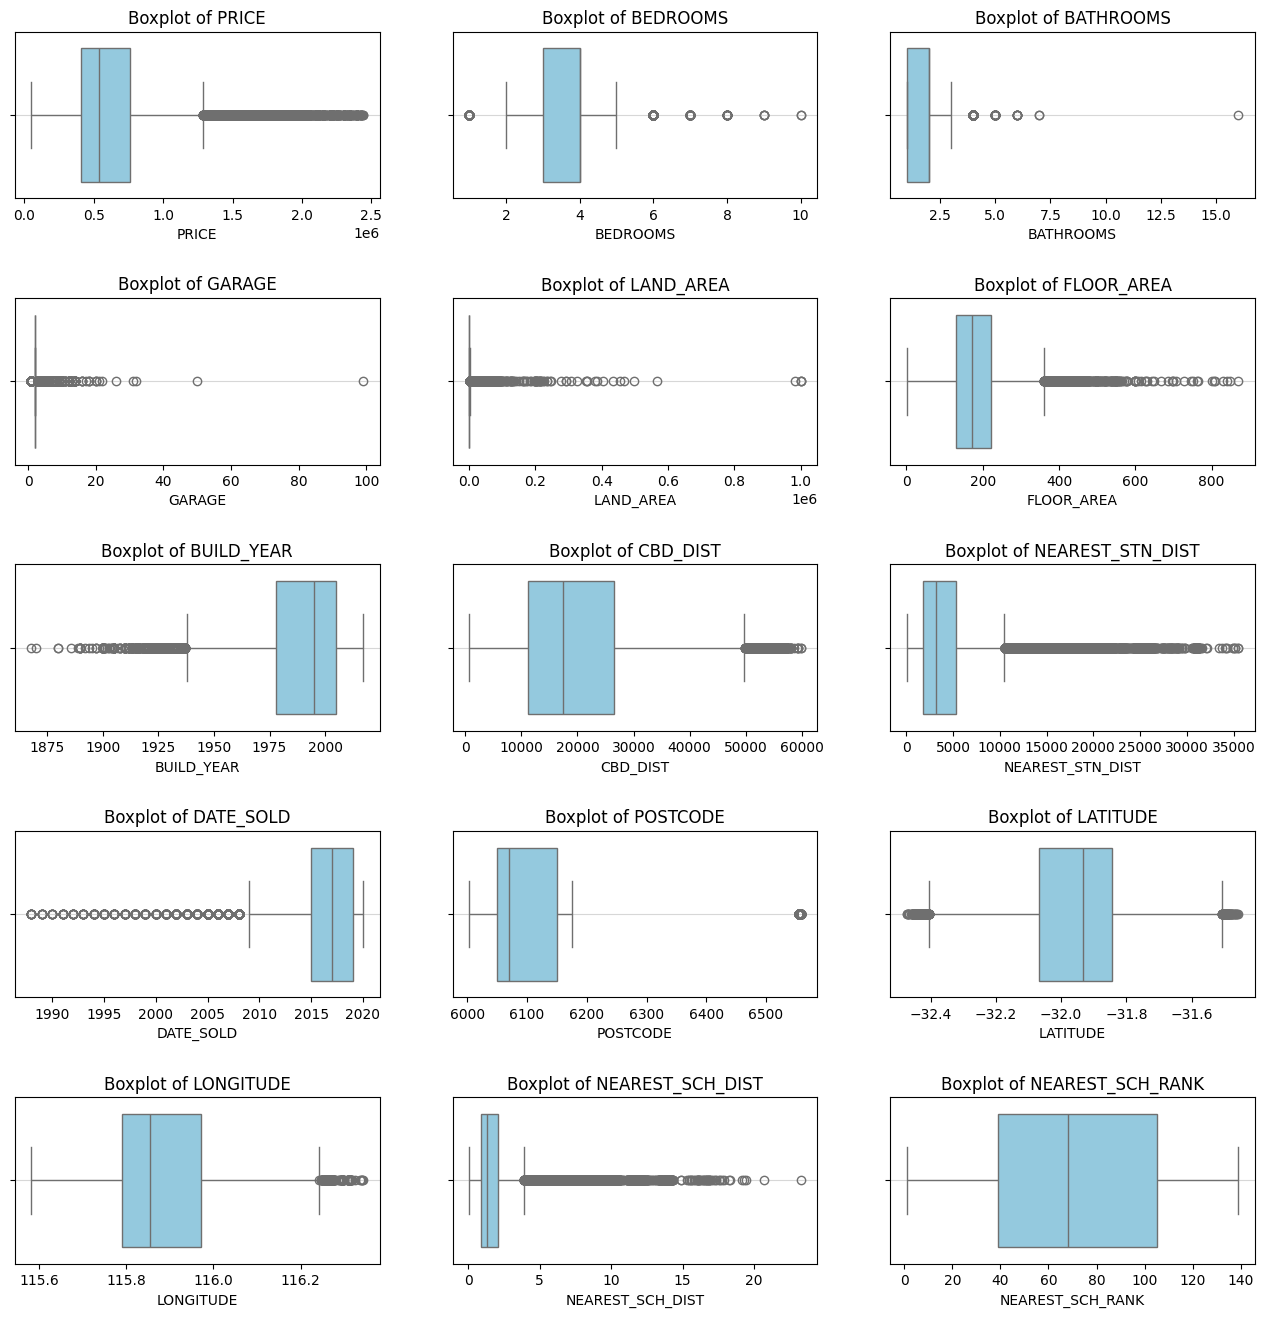

Percentage of Outliers PRICE:
Lower Bound: 0.00%
Upper Bound: 6.28%
Percentage of Outliers BEDROOMS:
Lower Bound: 0.28%
Upper Bound: 1.12%
Percentage of Outliers BATHROOMS:
Lower Bound: 0.00%
Upper Bound: 0.80%
Percentage of Outliers GARAGE:
Lower Bound: 15.72%
Upper Bound: 15.34%
Percentage of Outliers LAND_AREA:
Lower Bound: 0.00%
Upper Bound: 14.58%
Percentage of Outliers FLOOR_AREA:
Lower Bound: 0.00%
Upper Bound: 2.23%
Percentage of Outliers BUILD_YEAR:
Lower Bound: 2.87%
Upper Bound: 0.00%
Percentage of Outliers CBD_DIST:
Lower Bound: 0.00%
Upper Bound: 1.96%
Percentage of Outliers NEAREST_STN_DIST:
Lower Bound: 0.00%
Upper Bound: 9.01%
Percentage of Outliers DATE_SOLD:
Lower Bound: 3.21%
Upper Bound: 0.00%
Percentage of Outliers POSTCODE:
Lower Bound: 0.00%
Upper Bound: 0.47%
Percentage of Outliers LATITUDE:
Lower Bound: 1.19%
Upper Bound: 0.25%
Percentage of Outliers LONGITUDE:
Lower Bound: 0.00%
Upper Bound: 0.48%
Percentage of Outliers NEAREST_SCH_DIST:
Lower Bound: 0.00%
Upp

In [14]:
# Create boxplot subplots for each numeric column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=0.6)

axes = axes.flatten()

# Iterate over each column in the skewkurt DataFrame
for i, column in enumerate(skewkurt.index):
    ax = axes[i]
    sns.boxplot(x=data[column], color='skyblue', ax=ax, orient='v')
    ax.set_title(f'Boxplot of {column}')
    ax.set_ylabel('')
    ax.grid(axis='y', alpha=0.5)

for i in range(len(skewkurt.index), len(axes)):
    fig.delaxes(axes[i])

plt.show()

# Determining the threshold to define outliers
outlier_threshold = 1.5

# Initializing a dictionary to store the percentage of outliers
outliers_percentage = {}

# Calculating the IQR (Interquartile Range) and outliers
for attribute in numeric_features:
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Calculating the lower and upper bounds
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identifying outliers
    outliers_lower = data[data[attribute] < lower_bound]
    outliers_upper = data[data[attribute] > upper_bound]

    # Calculating the percentage of lower bound outliers
    percentage_lower = len(outliers_lower) / len(data) * 100

    # Calculating the percentage of upper bound outliers
    percentage_upper = len(outliers_upper) / len(data) * 100

    # Storing the percentage of outliers in a dictionary
    outliers_percentage['Lower Bound'] = percentage_lower
    outliers_percentage['Upper Bound'] = percentage_upper

    # Displaying the percentage of outliers
    print(f"Percentage of Outliers {attribute}:")
    print(f"Lower Bound: {percentage_lower:.2f}%")
    print(f"Upper Bound: {percentage_upper:.2f}%")


**Insights :**

1. **PRICE:** Approximately 6.28% outliers are identified above the upper bound, indicating some properties with exceptionally high prices.
2. **BEDROOMS:** The percentage of outliers is relatively low, about 0.28% below the lower bound and 1.12% above the upper bound. This suggests a small number of properties with either fewer or more bedrooms compared to most properties.
3. **BATHROOMS:** Only about 0.80% of outliers are above the upper bound, suggesting a more evenly distributed data. However, there is a small proportion of properties with a higher number of bathrooms compared to the majority.
4. **GARAGE:** This attribute exhibits a remarkably high percentage of outliers, approximately 15.72% below the lower bound and 15.34% above the upper bound. This indicates a highly uneven data distribution, suggesting many properties having garages accommodating significantly more or fewer vehicles compared to the majority of properties that fall within the average range (2 cars).
5. **LAND_AREA:** There are about 14.58% outliers above the upper bound, indicating a significant number of properties with extremely large land areas compared to others.
6. **FLOOR_AREA:** Only about 2.23% of outliers are above the upper bound, suggesting a small proportion of properties with larger floor areas compared to others.
7. **BUILD_YEAR:** Outliers are identified with 2.87% below the lower bound, indicating some properties built in older years compared to the majority.
8. **CBD_DIST:** There are about 1.96% outliers above the upper bound, indicating some properties having a farther distance to the city center compared to most properties.
9. **NEAREST_STN_DIST:** Indicates a high percentage of outliers, approximately 9.01% above the upper bound, suggesting some properties have very distant distances to the train station.
10. **POSTCODE:** Only about 0.47% of outliers are above the upper bound.
11. **LATITUDE:** Low outlier percentages, with 1.19% below the lower bound and 0.25% above the upper bound.
12. **LONGITUDE:** Approximately 0.48% outliers are above the upper bound.
**Outliers in latitude and longitude might not be as significant due to values being confined within Perth's territorial boundaries.**
13. **NEAREST_SCH_DIST:** Outliers are around 6.82% above the upper bound, indicating some properties have very distant distances to schools.
14. **NEAREST_SCH_RANK:** No outliers are identified in this attribute.

With this information on the percentage of outliers, we can better understand the extent of extreme data points in each attribute and recognize the importance of further handling outliers.

**4.4 Feature Correlation Analysis**

*In this section, we will analyze the correlation between features and the dependent variable (target) to determine which variables correlate with the target and can be used as independent variables in the modeling process.*

**4.4.1 Numeric Features Correlation Analysis**

*In this section, the Kendall method will be utilized for correlation analysis due to its effectiveness in handling datasets containing outliers.*

In [44]:
# Displaying the numerical colums
numeric_features.columns

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE',
       'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

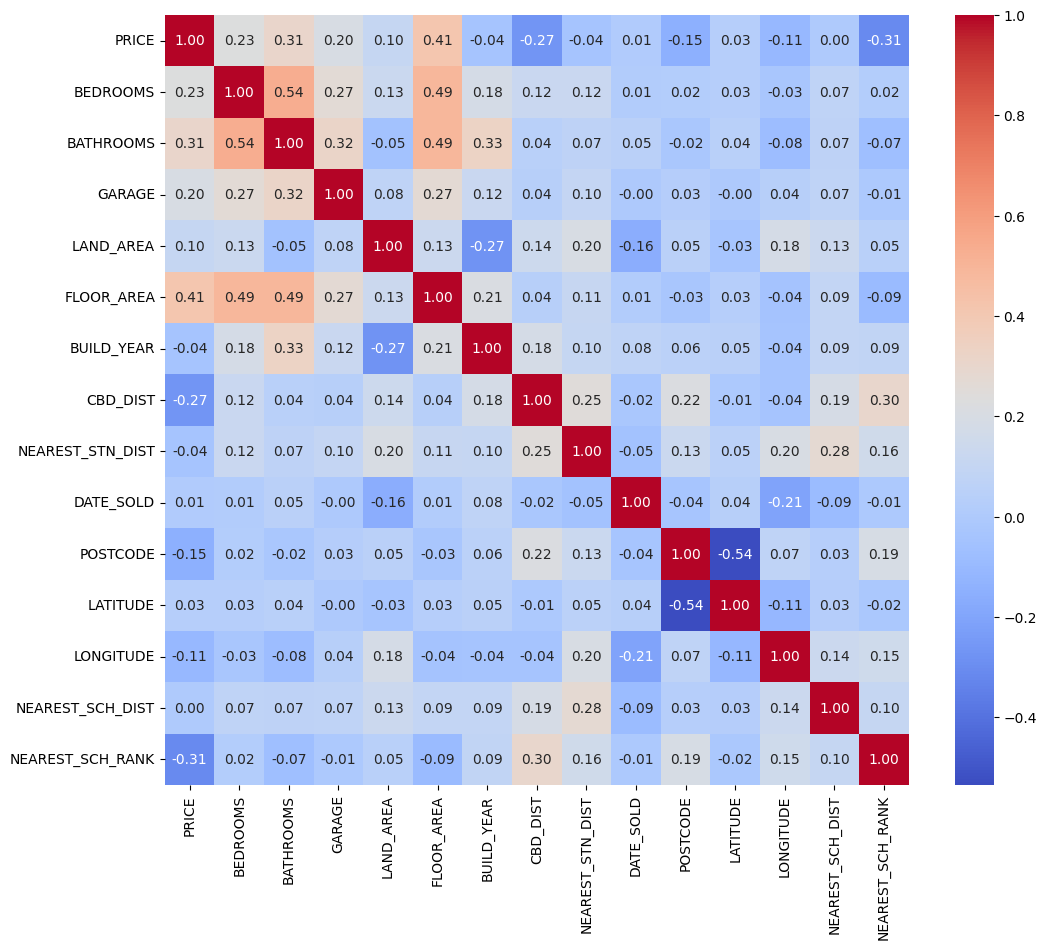

C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_18556\2440836234.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_df = correlation_matrix.applymap(categorize_correlation)


PRICE  \
PRICE                 High_Positive_Correlation   
BEDROOMS          Moderate_Positive_Correlation   
BATHROOMS         Moderate_Positive_Correlation   
GARAGE            Moderate_Positive_Correlation   
LAND_AREA         Moderate_Positive_Correlation   
FLOOR_AREA        Moderate_Positive_Correlation   
BUILD_YEAR             Low_Negative_Correlation   
CBD_DIST          Moderate_Negative_Correlation   
NEAREST_STN_DIST       Low_Negative_Correlation   
DATE_SOLD              Low_Positive_Correlation   
POSTCODE          Moderate_Negative_Correlation   
LATITUDE               Low_Positive_Correlation   
LONGITUDE         Moderate_Negative_Correlation   
NEAREST_SCH_DIST       Low_Positive_Correlation   
NEAREST_SCH_RANK  Moderate_Negative_Correlation   

                                       BEDROOMS  \
PRICE             Moderate_Positive_Correlation   
BEDROOMS              High_Positive_Correlation   
BATHROOMS             High_Positive_Correlation   
GARAGE            Moderate_Positive_Correlation   
LAND_AREA         Moderate_Positive_Correlation   
FLOOR_AREA        Moderate_Positive_Correlation   
BUILD_YEAR        Moderate_Positive_Correlation   
CBD_DIST          Moderate_Positive_Correlation   
NEAREST_STN_DIST  Moderate_Positive_Correlation   
DATE_SOLD              Low_Positive_Correlation   
POSTCODE               Low_Positive_Correlation   
LATITUDE               Low_Positive_Correlation   
LONGITUDE              Low_Negative_Correlation   
NEAREST_SCH_DIST       Low_Positive_Correlation   
NEAREST_SCH_RANK       Low_Positive_Correlation   

                                      BATHROOMS  \
PRICE             Moderate_Positive_Correlation   
BEDROOMS              High_Positive_Correlation   
BATHROOMS             High_Positive_Correlation   
GARAGE            Moderate_Positive_Correlation   
LAND_AREA              Low_Negative_Correlation   
FLOOR_AREA        Moderate_Positive_Correlation   
BUILD_YEAR        Moderate_Positive_Correlation   
CBD_DIST               Low_Positive_Correlation   
NEAREST_STN_DIST       Low_Positive_Correlation   
DATE_SOLD              Low_Positive_Correlation   
POSTCODE               Low_Negative_Correlation   
LATITUDE               Low_Positive_Correlation   
LONGITUDE              Low_Negative_Correlation   
NEAREST_SCH_DIST       Low_Positive_Correlation   
NEAREST_SCH_RANK       Low_Negative_Correlation   

                                         GARAGE  \
PRICE             Moderate_Positive_Correlation   
BEDROOMS          Moderate_Positive_Correlation   
BATHROOMS         Moderate_Positive_Correlation   
GARAGE                High_Positive_Correlation   
LAND_AREA              Low_Positive_Correlation   
FLOOR_AREA        Moderate_Positive_Correlation   
BUILD_YEAR        Moderate_Positive_Correlation   
CBD_DIST               Low_Positive_Correlation   
NEAREST_STN_DIST       Low_Positive_Correlation   
DATE_SOLD              Low_Negative_Correlation   
POSTCODE               Low_Positive_Correlation   
LATITUDE               Low_Negative_Correlation   
LONGITUDE              Low_Positive_Correlation   
NEAREST_SCH_DIST       Low_Positive_Correlation   
NEAREST_SCH_RANK       Low_Negative_Correlation   

                                      LAND_AREA  \
PRICE             Moderate_Positive_Correlation   
BEDROOMS          Moderate_Positive_Correlation   
BATHROOMS              Low_Negative_Correlation   
GARAGE                 Low_Positive_Correlation   
LAND_AREA             High_Positive_Correlation   
FLOOR_AREA        Moderate_Positive_Correlation   
BUILD_YEAR        Moderate_Negative_Correlation   
CBD_DIST          Moderate_Positive_Correlation   
NEAREST_STN_DIST  Moderate_Positive_Correlation   
DATE_SOLD         Moderate_Negative_Correlation   
POSTCODE               Low_Positive_Correlation   
LATITUDE               Low_Negative_Correlation   
LONGITUDE         Moderate_Positive_Correlation   
NEAREST_SCH_DIST  Moderate_Positive_Correlation   
NEAREST_S

In [46]:
# Defining the list 
numfeats = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE',
       'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK']

# Calculating the kendall correlation matrix
correlation_matrix = data[numfeats].corr(method='kendall')

# Creating the heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Displaying the heatmap
plt.show()

# Categorizing te correlation values
def categorize_correlation(correlation_matrix):
    if  correlation_matrix > 0.5:
        return 'High_Positive_Correlation'
    elif correlation_matrix > 0.1:
        return 'Moderate_Positive_Correlation'
    elif correlation_matrix > 0:
        return 'Low_Positive_Correlation'
    elif correlation_matrix < -0.5:
        return 'High_Negative_Correlation'
    elif correlation_matrix < -0.1:
        return 'Moderate_Negative_Correlation'
    else:
        return 'Low_Negative_Correlation'
    
# Showing the corelations in form of dataframe
correlation_df = correlation_matrix.applymap(categorize_correlation)
correlation_df

**Insight:**

Based on the Kendall correlation matrix analysis, the correlation between the numeric attributes in the dataset against the target variable (price) has been assessed. The obtained correlation values are then categorized into several groups as follows:

- "High_Positive_Correlation" indicates a strong positive correlation (correlation > 0.5).
- "Moderate_Positive_Correlation" indicates a moderate positive correlation (0.5 < correlation > 0.1).
- "Low_Positive_Correlation" indicates a weak positive correlation (0.1 < correlation > 0).
- "High_Negative_Correlation" indicates a strong negative correlation (correlation < -0.5).
- "Moderate_Negative_Correlation" indicates a moderate negative correlation (-0.5 < correlation < -0.1).
- "Low_Negative_Correlation" indicates a weak negative correlation (correlation < -0.1).

Here are insights regarding the correlation of variables in the dataset with the "PRICE" variable:

1. The property price does not have a strong positive correlation with other features in the dataset.

2. Price has a moderate positive correlation with:
   - Number of bedrooms (**BEDROOMS**).
   - Number of bathrooms (**BATHROOMS**).
   - Garage capacity (**GARAGE**).
   - Land area of the property (**LAND_AREA**).
   - Floor area (**FLOOR_AREA**).

3. Price has a weak positive correlation with:
   - Latitude (**LATITUDE**).
   - Distance to the nearest school (**NEAREST_SCH_DIST**).
   - Property sale year (**DATE_SOLD**).

4. The property price does not have a strong negative correlation with other features in the dataset.

5. Price has a moderate negative correlation with:
   - Distance of the property to the city center (**CBD_DIST**).
   - Postal code (**POSTCODE**).
   - Longitude (**LONGITUDE**).
   - Nearest school's ranking from the property (**NEAREST_SCH_RANK**).

6. Price has a weak negative correlation with:
   - Year the property was built (**BUILD_YEAR**).
   - Distance to the nearest station (**NEAREST_STN_DIST**).

From the categorization of the numeric feature correlations with the price, we can conclude that several features might have a significant influence on the model to be built, as they exhibit moderate to high correlations. Hence, the features with low correlation that have redundant information or can be represented by other features will be removed from the dataset during the modeling preparation. Some features to be removed include:
   - Year the property was built (**BUILD_YEAR**) -> Insignificant correlation
   - Distance to the nearest station (**NEAREST_STN_DIST**) -> Insignificant correlation
   - Latitude (**LATITUDE**) -> Insignificant correlation
   - Longitude (**LONGITUDE**) -> Moderate correlation, but its function can be represented by suburb or address
   - Distance to the nearest school (**NEAREST_SCH_DIST**) -> Insignificant correlation
   - Property sale year (**DATE_SOLD**) -> Insignificant correlation
   - Postal code (**POST_CODE**) -> Moderate correlation, but its function can be represented by suburb or address

**4.4.2 Categorical Features Correlation Analysis**

*While the Kendall method was used for analyzing numerical features correlations, in this section, we utilized the Phik correlations. The Phik correlation method has advantages in correlating both numerical and categorical features. Phik correlations are advantageous as they capture non-linear associations and are suitable for analyzing both discrete and continuous variables, making them particularly useful in handling datasets containing mixed data types.*

In [50]:
categorical_features = data.select_dtypes(include=object)
categorical_features.columns

Index(['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH'], dtype='object')

In [53]:
# Redefining list locations setelah dilakukan drop column timezone
attributes = ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH','PRICE']

# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['PRICE']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data[attributes].phik_matrix(interval_cols=interval_cols)

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable ADDRESS is large: 33566. Are you sure this is not an interval variable? Analysis for pairs of variables including ADDRESS can be slow.
  warnings.warn(


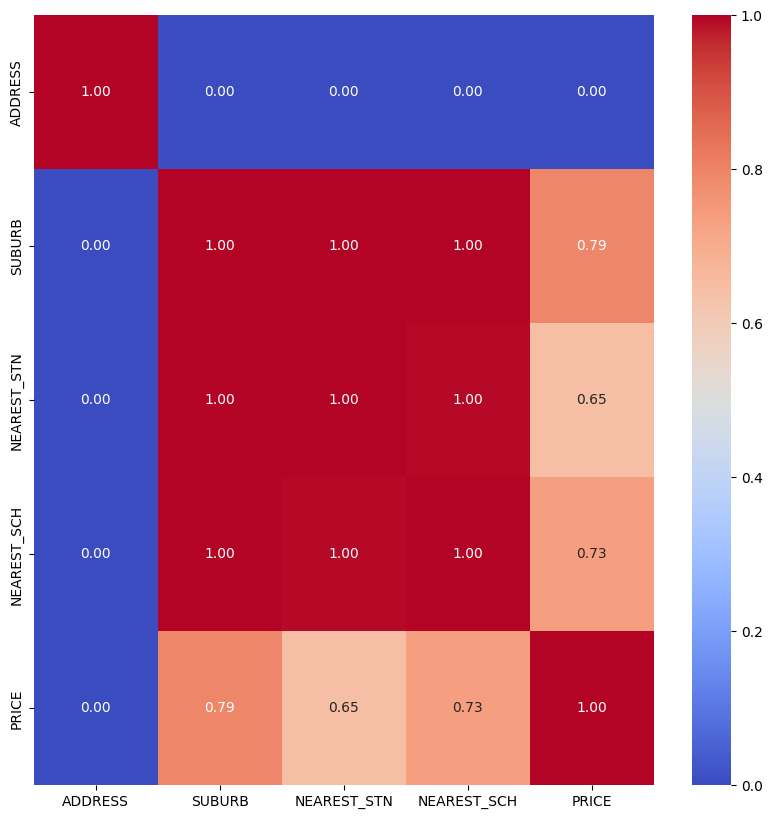

In [58]:
# Creating a heatmap with correlation number annotation
plt.figure(figsize=(10, 10))
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Displaying the heatmap
plt.show()

In [59]:
# Fungsi untuk mengkategorikan korelasi
def categorize_phikcorrelation(phik_overview):
    if  phik_overview > 0.5:
        return 'High_Positive_Correlation'
    elif phik_overview > 0.1:
        return 'Moderate_Positive_Correlation'
    elif phik_overview > 0:
        return 'Low_Positive_Correlation'
    elif phik_overview < -0.5:
        return 'High_Negative_Correlation'
    elif phik_overview < -0.1:
        return 'Moderate_Negative_Correlation'
    else:
        return 'Low_Negative_Correlation'
    
# Dataframe untuk korelasi kategoris
correlation_df = phik_overview.applymap(categorize_correlation)
correlation_df

C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_18556\1973980594.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_df = phik_overview.applymap(categorize_correlation)


ADDRESS                     SUBURB  \
ADDRESS      High_Positive_Correlation   Low_Negative_Correlation   
SUBURB        Low_Negative_Correlation  High_Positive_Correlation   
NEAREST_STN   Low_Negative_Correlation  High_Positive_Correlation   
NEAREST_SCH   Low_Negative_Correlation  High_Positive_Correlation   
PRICE         Low_Negative_Correlation  High_Positive_Correlation   

                           NEAREST_STN                NEAREST_SCH  \
ADDRESS       Low_Negative_Correlation   Low_Negative_Correlation   
SUBURB       High_Positive_Correlation  High_Positive_Correlation   
NEAREST_STN  High_Positive_Correlation  High_Positive_Correlation   
NEAREST_SCH  High_Positive_Correlation  High_Positive_Correlation   
PRICE        High_Positive_Correlation  High_Positive_Correlation   

                                 PRICE  
ADDRESS       Low_Negative_Correlation  
SUBURB       High_Positive_Correlation  
NEAREST_STN  High_Positive_Correlation  
NEAREST_SCH  High_Positive_Correlation  
PRICE        High_Positive_Correlation

**Insight:**

Based on the Phik correlation matrix analysis conducted, the correlation analysis between categorical attributes within the dataset and the target variable (price) was obtained. The correlation values were categorized into several groups as follows:

- "High_Positive_Correlation" represents a strong positive correlation (correlation > 0.5).
- "Moderate_Positive_Correlation" indicates a moderate positive correlation (0.5 < correlation > 0.1).
- "Low_Positive_Correlation" signifies a weak positive correlation (0.1 < correlation > 0).
- "High_Negative_Correlation" denotes a strong negative correlation (correlation < -0.5).
- "Moderate_Negative_Correlation" indicates a moderate negative correlation (-0.5 < correlation > -0.1).
- "Low_Negative_Correlation" signifies a weak negative correlation (correlation < -0.5).

Here are the insights regarding the correlation of categorical variables in the dataset with the "PRICE" variable:

1. Price has a strong positive correlation with:
   - Property location suburb (**SUBURB**)
   - Nearest station to the property (**NEAREST_STN**)
   - Nearest school to the property (**NEAREST_SCH**)

2. Price has a weak correlation with:
   - Property address (**ADDRESS**).

From the categorization of categorical feature correlations with the price, it can be concluded that features falling under moderate to high correlation categories tend to have a significant impact on the model. Therefore, features with low correlation will be removed from the dataset during the modeling preparation process. Based on the analysis of categorical feature correlations using Phik correlations, **ADDRESS** (Property address) is considered to have an insignificant correlation with property price. Hence, this feature will be eliminated.

**Correlation Analysis Summary**

1. Price has a strong correlation with:
   - **SUBURB**: This indicates that the location or area where the property is situated is a primary factor in determining property prices. Certain suburbs might be more expensive or have higher-quality properties.
   - **NEAREST_STN** and **NEAREST_SCH**: Properties closer to train stations or nearby schools tend to have higher prices. Accessibility to transportation and education might be significant factors in determining property prices.

2. Price has a moderate positive correlation with:
   - **BEDROOMS**, **BATHROOMS**, **GARAGE**: Properties with more bedrooms, bathrooms, and garage capacity tend to have higher prices. This reflects higher demand for houses with more amenities.
   - **LAND_AREA** and **FLOOR_AREA**: The land area and floor area of the property also positively contribute to the price. Larger properties tend to have higher prices.
   - **DATE_SOLD**: The property's sale date also moderately correlates with the price. This might be related to market trends evolving over time.

3. Price has a weak positive correlation with:
   - **LATITUDE**: Weak positive correlation suggests a relationship between geographic location (latitude) and property prices.
   - **NEAREST_SCH_DIST**: Distance to the nearest school contributes weakly to the price, although not as strongly as other factors.

4. Price has a moderate negative correlation with:
   - **CBD_DIST**, **POSTCODE**, **LONGITUDE**, **NEAREST_SCH_RANK**: All these features contribute negatively to the price. Property distance to the city center, postcode, longitude, and the rank of the nearest school has a negative impact on property prices. Prices tend to be lower if the property is farther from the city center, has a lower postcode, or is located farther from high-quality schools.

5. Price has a weak negative correlation with:
   - **BUILD_YEAR**, **NEAREST_STN_DIST**, **ADDRESS**: Weak negative correlations suggest these features have a small influence on property prices.

Hence, this correlation analysis can aid potential property buyers or investors in understanding the factors influencing property prices in this area, enabling more informed decisions. Additionally, the correlation analysis results indicate some attributes that can be eliminated from the data preparation for further modeling, some of which include:

   - Year the property was built (**BUILD_YEAR**) -> Insignificant correlation
   - Distance to the nearest station (**NEAREST_STN_DIST**) -> Insignificant correlation
   - Latitude (**LATITUDE**) -> Insignificant correlation
   - Longitude (**LONGITUDE**) -> Moderate correlation, but its function can be represented by suburb or address
   - Distance to the nearest school (**NEAREST_SCH_DIST**) -> Insignificant correlation
   - Property sale year (**DATE_SOLD**) -> Insignificant correlation
   - Postcode (**POST_CODE**) -> Moderate correlation, but its function can be represented by suburb or address
   - Address (**ADDRESS**) -> Insignificant correlation

**4.5 Analysis of the Influence of Distance to the City Center on Property Prices**

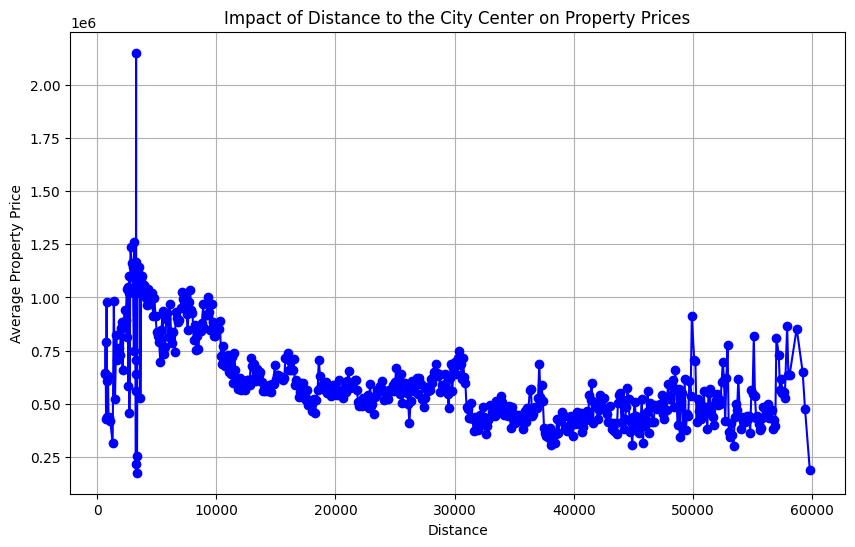

In [60]:
# Grouping the data based on the distance to the city center of a property and calculating the average price per distance.

cbd_dist_to_price = data.groupby(data['CBD_DIST'])['PRICE'].mean()

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(cbd_dist_to_price.index, cbd_dist_to_price, marker='o', linestyle='-', color='b')
plt.title('Impact of Distance to the City Center on Property Prices')
plt.xlabel('Distance')
plt.ylabel('Average Property Price')
plt.grid(True)

# Displaying the line chart
plt.show()

**Insight:**

From the analysis correlating the distance of a property to the city center with its price, there is a tendency that the closer a property is to the city center, the higher its price tends to be. This indicates a moderate positive correlation between proximity to the city center and property prices. This finding suggests an increase in property prices for those closer to the city center. This information is valuable for prospective property buyers and sellers seeking to understand the influencing factors affecting property prices in that area.

**4.6 Analysis of the Top 10 Suburbs with the Highest Prices**

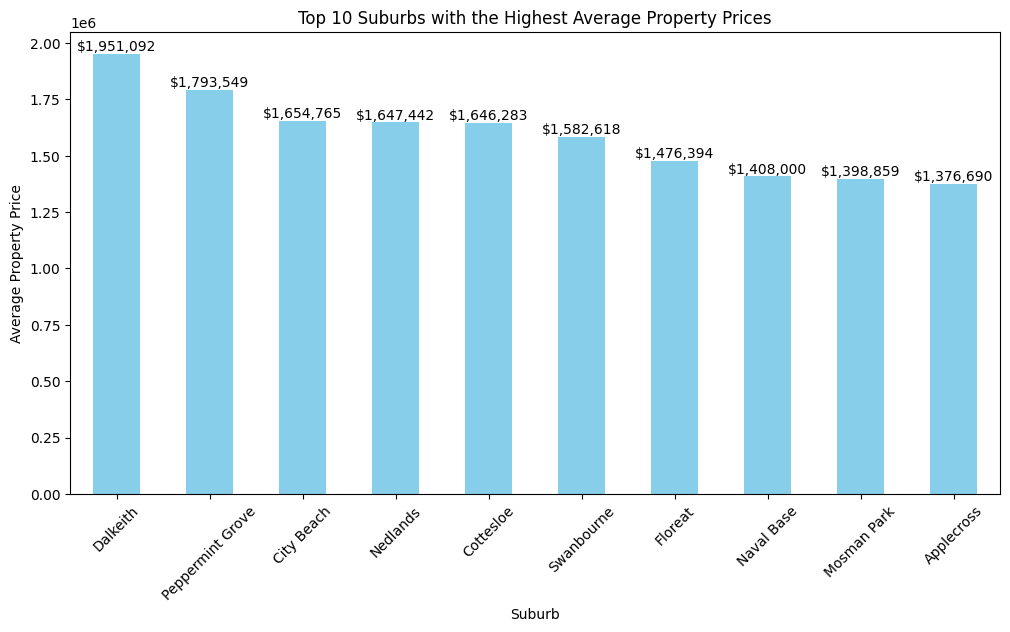

SUBURB
Dalkeith            1.951092e+06
Peppermint Grove    1.793549e+06
City Beach          1.654765e+06
Nedlands            1.647442e+06
Cottesloe           1.646283e+06
Swanbourne          1.582618e+06
Floreat             1.476394e+06
Naval Base          1.408000e+06
Mosman Park         1.398859e+06
Applecross          1.376690e+06
Name: PRICE, dtype: float64

In [61]:
# Sorting suburbs based on the average property prices
top_10_suburbs = data.groupby('SUBURB')['PRICE'].mean().sort_values(ascending=False).head(10)

# Setting up the plot display
plt.figure(figsize=(12, 6))

# Creating a bar chart
top_10_suburbs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Suburbs with the Highest Average Property Prices')
plt.xlabel('Suburb')
plt.ylabel('Average Property Price')

# Displaying price labels on each bar
for i, v in enumerate(top_10_suburbs):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Displaying the plot
plt.xticks(rotation=45)
plt.show()

top_10_suburbs

**Insight:**

From the data regarding the average property prices in the top 10 suburbs with the highest prices, we can draw several insights:

1. **Elite Suburbs**: Suburbs such as "Dalkeith," "Peppermint Grove," and "City Beach" exhibit remarkably high average property prices, exceeding $1.5 million. This indicates that these areas are inhabited by affluent residents and often offer luxurious properties.
   
2. **Exclusive Properties**: Suburbs like "Nedlands," "Cottesloe," and "Mosman Park" also showcase high average property prices, signifying high exclusivity and appeal within these areas.
   
3. **Coastal Region**: Many of these top 10 suburbs are situated in coastal regions such as "Peppermint Grove," "City Beach," "Cottesloe," "Swanbourne," and "Mosman Park." The high property prices in these areas might be largely attributed to their advantageous coastal locations.

4. **Applecross**: The suburb of "Applecross" also features in the top 10 suburbs with high prices, although its property prices are lower compared to some other suburbs. This suggests that Applecross might offer a relatively more affordable alternative for those seeking an exclusive neighborhood.

This information can serve as a guide for property investors or potential property buyers looking to identify potential exclusive areas for investment or property purchase.

Next, we will investigate the locations of these top 10 suburbs with the highest prices through map of perth to obtain a better understanding regarding the varying prices of properties in perth.

**Map of Perth**

In [392]:
# Extracting the necessary columns from the data
info = data[['LATITUDE', 'LONGITUDE', 'PRICE', 'SUBURB', 'BUILD_YEAR']]

# Creating a scatter map using 'SUBURB' as labels
fig = px.scatter_mapbox(info, lat='LATITUDE', lon='LONGITUDE', hover_name='SUBURB',
    hover_data=['BUILD_YEAR'], color='PRICE',
    zoom=8, height=500, width=1150)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 1, "l": 1, "b": 1})
fig.show()


**Analysis of Property Counts per Suburb in the Top 10 Suburbs**

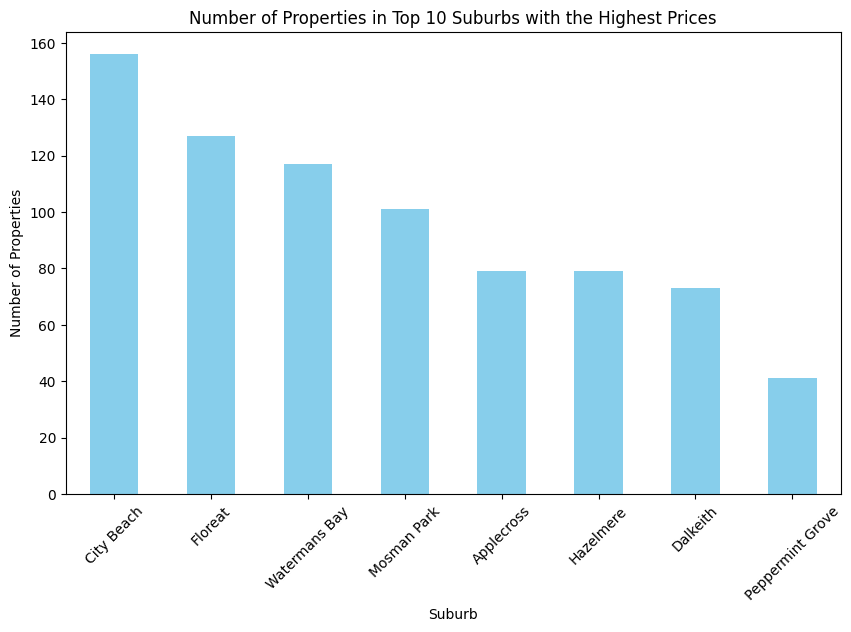

SUBURB
City Beach          156
Floreat             127
Watermans Bay       117
Mosman Park         101
Applecross           79
Hazelmere            79
Dalkeith             73
Peppermint Grove     41
Name: count, dtype: int64

In [62]:
# Top 10 suburbs with the highest prices
top_10_highest_price_suburbs = data.nlargest(10, 'PRICE')['SUBURB']

# Calculating the count of properties in each suburb
property_counts = data[data['SUBURB'].isin(top_10_highest_price_suburbs)]['SUBURB'].value_counts()

# Creating a bar chart
plt.figure(figsize=(10, 6))
property_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Properties in Top 10 Suburbs with the Highest Prices')
plt.xlabel('Suburb')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.show()

property_counts


**Insight:**

In the context of comparing the availability of properties, demand, and exclusivity (price) among exclusive suburbs (top 10 highest prices) in Perth, we can classify suburbs into three categories based on their characteristics:

1. **Suburbs with High Demand**:
   - Suburbs like "City Beach," "Floreat," "Watermans Bay," and "Mosman Park" have a significant number of properties, indicating high demand in these areas. This high demand might be driven by attractive geographical locations, access to public facilities, and the environmental appeal.

2. **Exclusive Suburbs**:
   - Suburbs such as "Applecross," "Hazelmere," and "Dalkeith," despite having fewer properties, exhibit high property prices, indicating the exclusivity of these areas where properties might be rarer and offer highly exclusive amenities. Exclusivity can generate high demand from specific market segments.

3. **Suburbs with Moderate Availability**:
   - Some other suburbs like "Peppermint Grove" also appear in the list but are not as popular or as exclusive as other suburbs. This might indicate that the demand in these areas could be more moderate, and the availability of properties is more balanced.

Therefore, it can be concluded that there are significant differences in the availability of properties, demand, and levels of exclusivity among suburbs in Perth. Suburbs with high demand may reflect their popularity and attractiveness among potential property buyers. Exclusive suburbs with fewer properties might indicate high exclusivity, resulting in higher property prices. Suburbs with moderate availability strike a balance between availability and demand.

**4.7 Suburbs with the Most Properties**

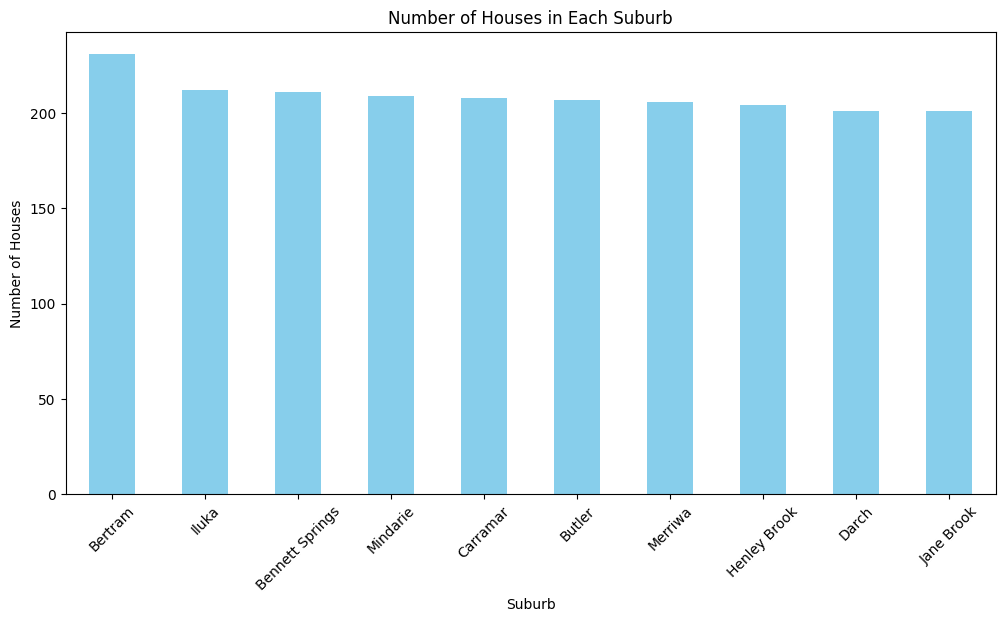

SUBURB
Bertram            231
Iluka              212
Bennett Springs    211
Mindarie           209
Carramar           208
Butler             207
Merriwa            206
Henley Brook       204
Darch              201
Jane Brook         201
Name: count, dtype: int64

In [63]:
# Calculating the number of houses in each suburb
suburb_counts = data['SUBURB'].value_counts()

# Taking the top 10 suburbs for display (adjust according to your preference)
top_suburbs = suburb_counts.head(10)

# Creating a Bar Chart
plt.figure(figsize=(12, 6))
top_suburbs.plot(kind='bar', color='skyblue')
plt.title('Number of Houses in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

top_suburbs

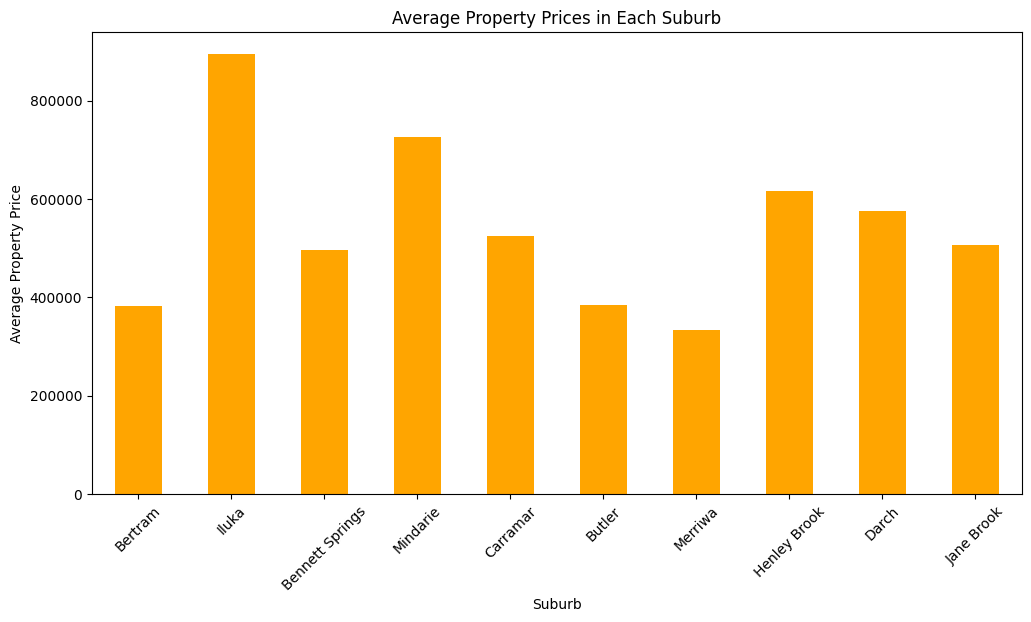

SUBURB
Bertram            381613.419913
Iluka              894611.792453
Bennett Springs    495591.725118
Mindarie           725433.492823
Carramar           524224.855769
Butler             383239.130435
Merriwa            333189.271845
Henley Brook       615389.200980
Darch              574450.437811
Jane Brook         506568.164179
Name: PRICE, dtype: float64

In [64]:
# Calculating the average price per suburb for the top 10 most populated suburbs
average_prices = data.groupby('SUBURB')['PRICE'].mean().loc[top_suburbs.index]

# Creating a Bar Chart for average price per suburb
plt.figure(figsize=(12, 6))
average_prices.plot(kind='bar', color='orange')
plt.title('Average Property Prices in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Property Price')
plt.xticks(rotation=45)
plt.show()

# Displaying the average price information per suburb
average_prices


**Insight:**

From the data above, we can derive insights regarding suburbs with most properties and that can be developed for property investment, namely:

**Suburb with High Demand (High Population):**
Based on this data, it appears that several suburbs such as "Bertram," "Iluka," "Bennett Springs," and "Mindarie" have a relatively high number of properties, with Bertram being the highest at 231 properties. This indicates that these suburbs tend to be popular among residents, suggesting a potentially high demand for housing in these areas.

**Suburb with High Property Prices (High Prices):**
On the other hand, there are suburbs with relatively high property prices, such as "Iluka," "Mindarie," "Henley Brook," and "Darch." Property prices in these suburbs are significantly above average, with "Iluka" having the highest prices. This suggests that these suburbs might be more exclusive or offer premium properties.

**Variation in Number of Properties and Property Prices:** Although "Bertram" has the highest number of properties, property prices in this suburb are below average. Conversely, "Iluka" boasts the highest property prices despite having slightly fewer properties than some other suburbs. This indicates a segmentation among suburbs based on the types of available properties, which impacts the property prices in those areas.

**Top 10 Properties Development Suburbs**

C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_18556\2846868405.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(top_10_suburbs))


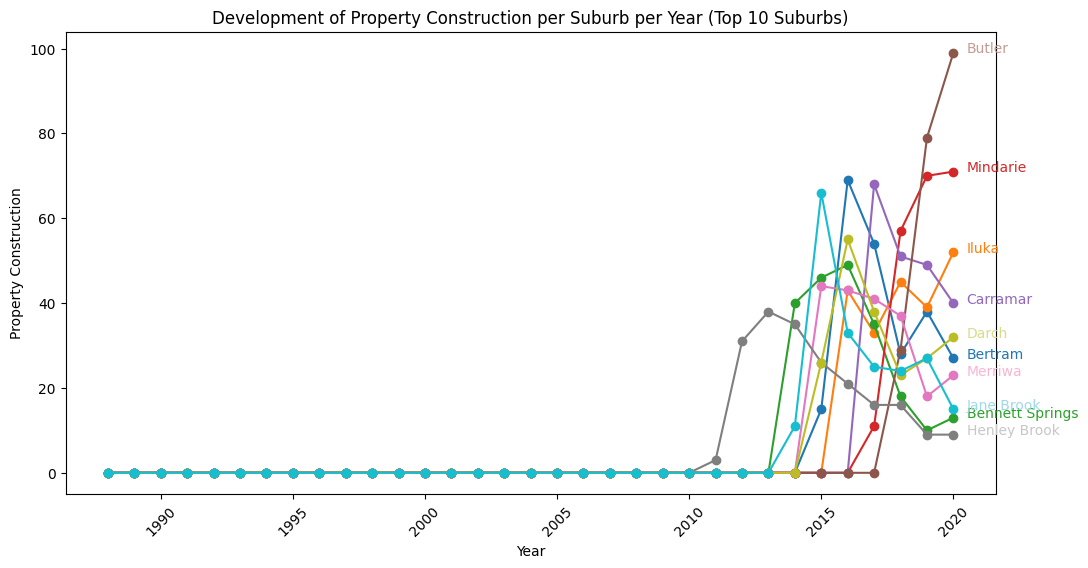

In [65]:
# Data on the number of properties per suburb per year
suburb_data = data.groupby(['SUBURB', data['DATE_SOLD']])['ADDRESS'].count().unstack().fillna(0)

# List of top 10 suburbs
top_10_suburbs = ['Bertram', 'Iluka', 'Bennett Springs', 'Mindarie', 'Carramar', 'Butler', 'Merriwa', 'Henley Brook', 'Darch', 'Jane Brook']

# Using the "tab20" color palette from matplotlib
colors = plt.cm.get_cmap('tab20', len(top_10_suburbs))

# Setting up the plot appearance
plt.figure(figsize=(12, 6))

# Creating a line chart for each suburb
for i, suburb in enumerate(top_10_suburbs):
    plt.plot(suburb_data.columns, suburb_data.loc[suburb], marker='o', label=suburb)
    # Adjusting label color with corresponding color
    plt.text(suburb_data.columns[-1] + 0.5, suburb_data.loc[suburb].iloc[-1], suburb, color=colors(i))

plt.title('Development of Property Construction per Suburb per Year (Top 10 Suburbs)')
plt.xlabel('Year')
plt.ylabel('Property Construction')

# Displaying the line chart
plt.xticks(rotation=45)
plt.show()

**Insight:**

From the visualization depicting the development of property construction per year in the top 10 suburbs,

It is observed that suburbs like "Butler," "Mindarie," and "Iluka" exhibit a substantial increase in property construction over the past 5 years. This indicates a potential for significant business development in these areas due to the observed increased demand over the past 5 years.

However, suburbs such as "Henley Brook," "Darch," and "Jane Brook" have experienced fluctuations tending towards a decrease in the number of properties in recent years. This could be attributed to specific factors affecting the property market in these areas.

Based on this analysis, it can be concluded that some suburbs with high development potential and increased demand are:

- Butler
- Mindarie
- Iluka

**Conclusion of Exploratory Data Analysis**

Based on the Exploratory Data Analysis (EDA) conducted on the property dataset in Perth, we can draw several conclusions and insights as follows:

1. **Property Counts and Availability**: There is a variation in the number of properties across different suburbs in Perth. Suburbs such as "Bertram," "Iluka," "Bennett Springs," and "Mindarie" have a high number of properties, indicating dense populations and high demand for accommodation. However, there are also suburbs with fewer properties.

2. **Variation in Property Types**: There is diversity in the types of properties available in suburbs, which affects property prices. Some suburbs may offer more exclusive or premium property types, while others have more affordable properties.

3. **Property Investment**: This data can provide insights for property developers or potential investors about suburbs that might be attractive for further development or property investment according to their targeted investment segmentation (exclusive or more affordable properties). Insights based on population growth indicators (represented in this data by property development trends), property prices, and facilities in the surrounding area could guide potential investment decisions.

Additionally, other information observed about the dataset includes:
- Uneven data distribution in several attributes.
- Outliers: Significant indications of outliers in several attributes necessitate further outlier handling steps.
- Missing Values: Identified missing values in attributes like garage, build year, and nearest school rank, requiring further handling. The observations about these missing values also offer guidance on the appropriate steps for handling them based on the respective attributes:
    - Garage Attribute Missing Values: These missing values could be due to some properties not having a garage (Missing Not At Random) -> Missing values can be assumed as "0" or no garage.
    - Nearest School Rank: These missing values could be due to some missing informations, due to its significant impact towards property prices, the nearest school rank will be imputed by using the KNN imputer
    - Build Year: Missing values in this column are assumed to represent a lack of recorded or available information about the year of construction of the property. Given its extremely minimal correlation with property price, the approach to handle missing values in this attribute is by dropping the column from the data.

# V. Feature Engineering 

*Feature Engineering is the process of transforming raw data into useful features in modeling, involving data analysis, business knowledge, and intuition.*

**5.1 Rechecking Datas**

In [66]:
data.info() # displaying the summary of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  int32  
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

**Insights:**

From the conducted EDA, there are several steps that need to be taken before proceeding with the modeling. These steps include:
- Dropping columns that have minimum correlation with the target variable (price):
   - Year the property was built (**BUILD_YEAR**) -> Insignificant correlation
   - Distance to the nearest station (**NEAREST_STN_DIST**) -> Insignificant correlation
   - Latitude (**LATITUDE**) -> Insignificant correlation
   - Longitude (**LONGITUDE**) -> Moderate correlation, yet its function can be represented by suburb or address
   - Distance to the nearest school (**NEAREST_SCH_DIST**) -> Insignificant correlation
   - Property sales year (**DATE_SOLD**) -> Insignificant correlation
   - Postcode (**POST_CODE**) -> Moderate correlation, yet its function can be represented by suburb or address
   - Address (**ADDRESS**) -> Insignificant correlation
- Missing Values Handling (Garage Attribute) -> Imputation of missing values with the value 0
- Missing Values Handling (Nearest School Rank Attribute) -> Imputation of missing values with the KNN Imputer
- Outliers Handling -> Using non-parametric methods

**Duplicate Dataset**

*This process is performed to avoid altering the original dataset.*

In [92]:
df_ = data.copy() # COpying the dataset
df_ # Displaying the data

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800       2018      6164   
1               Kwinana Station              4900       2019      6167   
2               Challis Station              1900       2015      6111   
3               Midland Station              3600       2018      6056   
4            Bassendean Station              2000       2016      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500       2016      6162   
33652          Stirling Station              4600       2017      6061   
33653          Stirling Station              4600       2017      6061   
33654           Warwick Station              4400       2016      6064   
33655           Midland Station              1700       2016      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

**5.2 Feature Selection**

*This section is dedicated to feature selection for the project. We will drop several attributes with weak correlations along with the longitude attribute, which seems to be representable by the postal code in this project's context.*

**5.2.1 Checking Duplicate Values**

*Performed to minimize the presence of duplicate rows and to reduce data redundancy.*

In [93]:
# Calculate the number of duplicate rows
duplicate_rows_count = df_.duplicated().sum()

# Displaying the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


There are no duplicate entries in the data.

**5.2.2 Drop Columns**

*In this section, we will drop the insignificant columns from the dataset.*

In [94]:
df_.info() # Checking the columns index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  int32  
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

The columns that will be dropped are:
   - Address (**ADDRESS**)
   - Year the property was built (**BUILD_YEAR**) 
   - Distance to the nearest station (**NEAREST_STN_DIST**) 
   - Latitude (**LATITUDE**) 
   - Longitude (**LONGITUDE**) 
   - Distance to the nearest school (**NEAREST_SCH_DIST**) 
   - Date when the property was sold (**DATE_SOLD**) 
   - Postal Code (**POST_CODE**)

In [95]:
# Performing column selection for deletion
columns_to_drop = [0, 8, 11, 12, 13, 14, 15, 17]  # Determining columns to be dropped
df_ = df_.drop(columns=df_.columns[columns_to_drop])  # Executing the process to drop columns
df_.info()  # Displaying the updated list of columns in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            31178 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   CBD_DIST          33656 non-null  int64  
 8   NEAREST_STN       33656 non-null  object 
 9   NEAREST_SCH       33656 non-null  object 
 10  NEAREST_SCH_RANK  22704 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ MB


The elimination of unnecessary attributes has been successfully completed. Next, missing value imputation will be performed.

**5.3 Feature Transformation**

*In this section, we will perform missing value imputation, data type conversion, renaming the 'date sold' column to 'year sold' for annual observation, handling outliers, as well as feature scaling and encoding.*

**5.3.1 Handling Missing Values**

**Handling Missing Values for 'Garage' Feature**

In [96]:
df_['GARAGE'] =df_['GARAGE'].fillna(0)

In [97]:
df_

SUBURB    PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
0           South Lake   565000         4          2     2.0        600   
1                Wandi   365000         3          2     2.0        351   
2              Camillo   287000         3          1     1.0        719   
3             Bellevue   255000         2          1     2.0        651   
4            Lockridge   325000         4          1     2.0        466   
...                ...      ...       ...        ...     ...        ...   
33651  South Fremantle  1040000         4          3     2.0        292   
33652      Westminster   410000         3          2     2.0        228   
33653      Westminster   427000         3          2     2.0        261   
33654       Girrawheen   295000         3          1     2.0        457   
33655          Midland   295000         3          1     2.0        296   

       FLOOR_AREA  CBD_DIST               NEAREST_STN  \
0             160     18300  Cockburn Central Station   
1             139     26900           Kwinana Station   
2              86     22600           Challis Station   
3              59     17900           Midland Station   
4             131     11200        Bassendean Station   
...           ...       ...                       ...   
33651         245     16100         Fremantle Station   
33652         114      9600          Stirling Station   
33653         112      9600          Stirling Station   
33654          85     12600           Warwick Station   
33655          95     16700           Midland Station   

                                       NEAREST_SCH  NEAREST_SCH_RANK  
0                      LAKELAND SENIOR HIGH SCHOOL               NaN  
1                                   ATWELL COLLEGE             129.0  
2                     KELMSCOTT SENIOR HIGH SCHOOL             113.0  
3                     SWAN VIEW SENIOR HIGH SCHOOL               NaN  
4                                    KIARA COLLEGE               NaN  
...                                            ...               ...  
33651                  CHRISTIAN BROTHERS' COLLEGE              49.0  
33652  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL              35.0  
33653  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL              35.0  
33654                GIRRAWHEEN SENIOR HIGH SCHOOL               NaN  
33655                             LA SALLE COLLEGE              53.0  

[33656 rows x 11 columns]

In [98]:
missingFE = df_.isnull().sum() # Initializing a variable 'missingFE' to count the number of missing values in the dataset
missingFE_percentage = (df_.isnull().sum() / len(df_)) * 100 # Initializing a variable 'missingFE_percentage' to calculate the percentage of missing values in the dataset
info_missingFE = pd.DataFrame({'Number of Missing Values': missingFE, 'Percentage of Missing Values': missingFE_percentage}) # Initializing a variable to display the number of missing values along with their percentages per feature in the dataset
info_missingFE # Displaying the results of missing values calculation in a dataframe

Number of Missing Values  Percentage of Missing Values
SUBURB                                   0                      0.000000
PRICE                                    0                      0.000000
BEDROOMS                                 0                      0.000000
BATHROOMS                                0                      0.000000
GARAGE                                   0                      0.000000
LAND_AREA                                0                      0.000000
FLOOR_AREA                               0                      0.000000
CBD_DIST                                 0                      0.000000
NEAREST_STN                              0                      0.000000
NEAREST_SCH                              0                      0.000000
NEAREST_SCH_RANK                     10952                     32.541003

Missing values in 'Garage' Feature has been successfully handled by imputing the missing values with 0, assume the missing values are due to the absence of garage in the properties

**Handling Missing Values For Nearest School Rank**

In [100]:
# Impute using KNN Imputer
imputer = KNNImputer()
df_['NEAREST_SCH_RANK'] = imputer.fit_transform(df_[['NEAREST_SCH_RANK']])
# Round the KNN Imputer result to obtain the school rank
df_['NEAREST_SCH_RANK'] = df_['NEAREST_SCH_RANK'].round().astype(int)

In [101]:
df_

SUBURB    PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  \
0           South Lake   565000         4          2     2.0        600   
1                Wandi   365000         3          2     2.0        351   
2              Camillo   287000         3          1     1.0        719   
3             Bellevue   255000         2          1     2.0        651   
4            Lockridge   325000         4          1     2.0        466   
...                ...      ...       ...        ...     ...        ...   
33651  South Fremantle  1040000         4          3     2.0        292   
33652      Westminster   410000         3          2     2.0        228   
33653      Westminster   427000         3          2     2.0        261   
33654       Girrawheen   295000         3          1     2.0        457   
33655          Midland   295000         3          1     2.0        296   

       FLOOR_AREA  CBD_DIST               NEAREST_STN  \
0             160     18300  Cockburn Central Station   
1             139     26900           Kwinana Station   
2              86     22600           Challis Station   
3              59     17900           Midland Station   
4             131     11200        Bassendean Station   
...           ...       ...                       ...   
33651         245     16100         Fremantle Station   
33652         114      9600          Stirling Station   
33653         112      9600          Stirling Station   
33654          85     12600           Warwick Station   
33655          95     16700           Midland Station   

                                       NEAREST_SCH  NEAREST_SCH_RANK  
0                      LAKELAND SENIOR HIGH SCHOOL                73  
1                                   ATWELL COLLEGE               129  
2                     KELMSCOTT SENIOR HIGH SCHOOL               113  
3                     SWAN VIEW SENIOR HIGH SCHOOL                73  
4                                    KIARA COLLEGE                73  
...                                            ...               ...  
33651                  CHRISTIAN BROTHERS' COLLEGE                49  
33652  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL                35  
33653  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL                35  
33654                GIRRAWHEEN SENIOR HIGH SCHOOL                73  
33655                             LA SALLE COLLEGE                53  

[33656 rows x 11 columns]

In [103]:
missingFE = df_.isnull().sum() # Initializing a variable 'missingFE' to count the number of missing values in the dataset
missingFE_percentage = (df_.isnull().sum() / len(df_)) * 100 # Initializing a variable 'missingFE_percentage' to calculate the percentage of missing values in the dataset
info_missingFE = pd.DataFrame({'Number of Missing Values': missingFE, 'Percentage of Missing Values': missingFE_percentage}) # Initializing a variable to display the number of missing values along with their percentages per feature in the dataset
info_missingFE # Displaying the results of missing values calculation in a dataframe

Number of Missing Values  Percentage of Missing Values
SUBURB                                   0                           0.0
PRICE                                    0                           0.0
BEDROOMS                                 0                           0.0
BATHROOMS                                0                           0.0
GARAGE                                   0                           0.0
LAND_AREA                                0                           0.0
FLOOR_AREA                               0                           0.0
CBD_DIST                                 0                           0.0
NEAREST_STN                              0                           0.0
NEAREST_SCH                              0                           0.0
NEAREST_SCH_RANK                         0                           0.0

the missing values has been successfully imputed by using KNN imputer

**5.3.2 Multicollinearity Checking**

*This multicollinearity check is necessary to gather information about multicollinearity among features in the dataset. It's deemed essential due to the multitude of features present in the dataset, which might lead to multicollinearity issues and potentially affect the model's performance, making it less optimal.*

In [104]:
df_.columns

Index(['SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN', 'NEAREST_SCH',
       'NEAREST_SCH_RANK'],
      dtype='object')

In [105]:
# Filtering numerical and categorical feature columns
numerical_features = ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_SCH_RANK']
categorical_features = ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH']

# Create a dataframe for numerical columns
numerical_df = df_[numerical_features]

# Create a dataframe for categorical columns
categorical_df = df_[categorical_features]

In [106]:
categorical_df

SUBURB               NEAREST_STN  \
0           South Lake  Cockburn Central Station   
1                Wandi           Kwinana Station   
2              Camillo           Challis Station   
3             Bellevue           Midland Station   
4            Lockridge        Bassendean Station   
...                ...                       ...   
33651  South Fremantle         Fremantle Station   
33652      Westminster          Stirling Station   
33653      Westminster          Stirling Station   
33654       Girrawheen           Warwick Station   
33655          Midland           Midland Station   

                                       NEAREST_SCH  
0                      LAKELAND SENIOR HIGH SCHOOL  
1                                   ATWELL COLLEGE  
2                     KELMSCOTT SENIOR HIGH SCHOOL  
3                     SWAN VIEW SENIOR HIGH SCHOOL  
4                                    KIARA COLLEGE  
...                                            ...  
33651                  CHRISTIAN BROTHERS' COLLEGE  
33652  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL  
33653  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL  
33654                GIRRAWHEEN SENIOR HIGH SCHOOL  
33655                             LA SALLE COLLEGE  

[33656 rows x 3 columns]

In [107]:
numerical_df

BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0             4          2     2.0        600         160     18300   
1             3          2     2.0        351         139     26900   
2             3          1     1.0        719          86     22600   
3             2          1     2.0        651          59     17900   
4             4          1     2.0        466         131     11200   
...         ...        ...     ...        ...         ...       ...   
33651         4          3     2.0        292         245     16100   
33652         3          2     2.0        228         114      9600   
33653         3          2     2.0        261         112      9600   
33654         3          1     2.0        457          85     12600   
33655         3          1     2.0        296          95     16700   

       NEAREST_SCH_RANK  
0                    73  
1                   129  
2                   113  
3                    73  
4                    73  
...                 ...  
33651                49  
33652                35  
33653                35  
33654                73  
33655                53  

[33656 rows x 7 columns]

In [108]:
# Create a function to calculate VIF for a set of numerical independent variables
def calc_vif(numerical_df):
    # Create an empty DataFrame to store variable names and their VIF values
    vif = pd.DataFrame()

    # Add columns to the DataFrame for variable names
    vif["Variable"] = numerical_df.columns

    # Calculate VIF values for each variable and store them in the 'VIF' column
    vif["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

    # Return the DataFrame with variable names and their VIF values
    return vif

In [109]:
calc_vif(numerical_df) # Displaying the results

Variable        VIF
0          BEDROOMS  26.733588
1         BATHROOMS  17.790566
2            GARAGE   3.182447
3         LAND_AREA   1.049713
4        FLOOR_AREA  12.419792
5          CBD_DIST   4.396609
6  NEAREST_SCH_RANK   5.585463

**Insight:**

Considering the insights provided by the VIF data and the correlation between variables in the dataset, we can draw the following relationships:

**BEDROOMS and BATHROOMS:** Both variables have high VIF and a strong correlation. This indicates that "BEDROOMS" and "BATHROOMS" exhibit significant multicollinearity and possess a notably strong positive correlation.

**FLOOR_AREA:** The "FLOOR_AREA" variable has a high VIF and strong correlation with some other variables such as "BEDROOMS" and "BATHROOMS."

From the insights above, to address multicollinearity in the data, dropping the "BATHROOMS" and "FLOOR_AREA" features might be considered an appropriate step. This decision assumes that, in practical cases, these two attributes have less significant influence and can be well represented by "BEDROOMS" and "LAND_AREA" in terms of information and their correlation with property prices.

In [110]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   BATHROOMS         33656 non-null  int64  
 4   GARAGE            33656 non-null  float64
 5   LAND_AREA         33656 non-null  int64  
 6   FLOOR_AREA        33656 non-null  int64  
 7   CBD_DIST          33656 non-null  int64  
 8   NEAREST_STN       33656 non-null  object 
 9   NEAREST_SCH       33656 non-null  object 
 10  NEAREST_SCH_RANK  33656 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 2.7+ MB


In [111]:
# Column selection for deletion
columns_to_drop = [3, 6]  # Defining columns to be dropped
df_ = df_.drop(columns=df_.columns[columns_to_drop])  # Executing the column drop process
df_.info()  # Displaying the list of columns in the data again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            33656 non-null  object 
 1   PRICE             33656 non-null  int64  
 2   BEDROOMS          33656 non-null  int64  
 3   GARAGE            33656 non-null  float64
 4   LAND_AREA         33656 non-null  int64  
 5   CBD_DIST          33656 non-null  int64  
 6   NEAREST_STN       33656 non-null  object 
 7   NEAREST_SCH       33656 non-null  object 
 8   NEAREST_SCH_RANK  33656 non-null  int32  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 2.2+ MB


In [125]:
# Re-filter the columns to be used in the multicollinearity checking
numerical_df = ['BEDROOMS','GARAGE','LAND_AREA','CBD_DIST','NEAREST_SCH_RANK']
# Transforming the variable into a dataframe
numerical_df = df_[numerical_df]

**Rechecking the Multicollinearity**

In [126]:
# Create a function to calculate VIF for a set of numerical independent variables
def calc_vif(numerical_df):
    # Create an empty DataFrame to store variable names and their VIF values
    vif = pd.DataFrame()

    # Add columns to the DataFrame for variable names
    vif["Variable"] = numerical_df.columns

    # Calculate VIF values for each variable and store them in the 'VIF' column
    vif["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(numerical_df.shape[1])]

    # Return the DataFrame with variable names and their VIF values
    return vif

In [127]:
calc_vif(numerical_df)

Variable       VIF
0          BEDROOMS  8.007782
1            GARAGE  3.120011
2         LAND_AREA  1.045076
3          CBD_DIST  4.395527
4  NEAREST_SCH_RANK  5.467634

**Insight :**

The issue of multicollinearity has been effectively resolved.

In [128]:
# Duplicating the dataset
duplicate = df_.copy()

In [129]:
duplicate

SUBURB    PRICE  BEDROOMS  GARAGE  LAND_AREA  CBD_DIST  \
0           South Lake   565000         4     2.0        600     18300   
1                Wandi   365000         3     2.0        351     26900   
2              Camillo   287000         3     1.0        719     22600   
3             Bellevue   255000         2     2.0        651     17900   
4            Lockridge   325000         4     2.0        466     11200   
...                ...      ...       ...     ...        ...       ...   
33651  South Fremantle  1040000         4     2.0        292     16100   
33652      Westminster   410000         3     2.0        228      9600   
33653      Westminster   427000         3     2.0        261      9600   
33654       Girrawheen   295000         3     2.0        457     12600   
33655          Midland   295000         3     2.0        296     16700   

                    NEAREST_STN                                  NEAREST_SCH  \
0      Cockburn Central Station                  LAKELAND SENIOR HIGH SCHOOL   
1               Kwinana Station                               ATWELL COLLEGE   
2               Challis Station                 KELMSCOTT SENIOR HIGH SCHOOL   
3               Midland Station                 SWAN VIEW SENIOR HIGH SCHOOL   
4            Bassendean Station                                KIARA COLLEGE   
...                         ...                                          ...   
33651         Fremantle Station                  CHRISTIAN BROTHERS' COLLEGE   
33652          Stirling Station  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653          Stirling Station  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654           Warwick Station                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655           Midland Station                             LA SALLE COLLEGE   

       NEAREST_SCH_RANK  
0                    73  
1                   129  
2                   113  
3                    73  
4                    73  
...                 ...  
33651                49  
33652                35  
33653                35  
33654                73  
33655                53  

[33656 rows x 9 columns]

**5.3.4 Split Data**

**Split the data into X (features) and y (target), as well as into Training and Test Data**

In [130]:
# Separate features (X) and target (y)
X = duplicate.drop(['PRICE'], axis=1) # Remove price (target variable) from the data X
y = duplicate['PRICE']  # Replace with the appropriate target name according to your dataset

# Split the data into training and testing data with a test size of 20% and random state = 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (26924, 8)
X_test (6732, 8)


In [131]:
print('Train size', X_train.shape)
print('Test size', X_test.shape)
print('Test size', y_train.shape)
print('Test size', y_test.shape)

Train size (26924, 8)
Test size (6732, 8)
Test size (26924,)
Test size (6732,)


In [132]:
# Split the column categories into 2 sections, namely categorical and numerical

num_col = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

# Displaying columns based on their categorical division
print('Numeric Columns: ', num_col)
print('Categorical Columns: ', cat_col)

Numeric Columns:  ['BEDROOMS', 'GARAGE', 'LAND_AREA', 'CBD_DIST', 'NEAREST_SCH_RANK']
Categorical Columns:  ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH']


In [133]:
# Split train and test based on column categories

X_train_num = X_train[num_col]
X_test_num = X_test[num_col]

X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

X_train_num # Displaying numeric train data on the independent variable (X)

BEDROOMS  GARAGE  LAND_AREA  CBD_DIST  NEAREST_SCH_RANK
23299         4     2.0       2022     14300                73
7347          4     2.0       2000     30700                73
16353         4     2.0        726     47300                73
8702          4     2.0        466      4600                14
26909         4     2.0        659     36700                39
...         ...     ...        ...       ...               ...
19183         3     1.0        810     55800                73
4180          3     1.0        701     24900               139
25773         2     1.0        506      4100                37
3491          4     2.0        710     24000               139
14100         4     2.0        601     27600                92

[26924 rows x 5 columns]

In [134]:
X_test_num

BEDROOMS  GARAGE  LAND_AREA  CBD_DIST  NEAREST_SCH_RANK
21569         3     2.0        221      3600                37
26140         3     2.0        325      2900                 1
13926         4     2.0        520      8600                34
13439         4     4.0        763     15200                86
13296         4     2.0       2414     26000               113
...         ...     ...        ...       ...               ...
3404          3     2.0        683     20800               102
8316          3     2.0        603     33500               118
26586         4     2.0        620     20700                73
4397          3     1.0        556      2000               106
25374         3     1.0       1008      4600                73

[6732 rows x 5 columns]

In [135]:
X_train_cat

SUBURB          NEAREST_STN                     NEAREST_SCH
23299        Kenwick      Kenwick Station      REHOBOTH CHRISTIAN COLLEGE
7347       Mundaring      Midland Station     MUNDARING CHRISTIAN COLLEGE
16353   Port Kennedy      Warnbro Station   WARNBRO COMMUNITY HIGH SCHOOL
8702        Jolimont      Daglish Station                 SHENTON COLLEGE
26909       Jindalee       Butler Station                  BUTLER COLLEGE
...              ...                  ...                             ...
19183      Two Rocks       Butler Station       YANCHEP SECONDARY COLLEGE
4180        Armadale     Sherwood Station           CECIL ANDREWS COLLEGE
25773     Kensington  Claisebrook Station                  WESLEY COLLEGE
3491   Seville Grove     Sherwood Station           CECIL ANDREWS COLLEGE
14100       Carramar   Currambine Station  JOSEPH BANKS SECONDARY COLLEGE

[26924 rows x 3 columns]

In [136]:
X_test_cat

SUBURB               NEAREST_STN  \
21569        Kensington                       Vic   
26140  West Leederville  West Leederville Station   
13926           Ardross        Bull Creek Station   
13439         Greenwood           Warwick Station   
13296        Roleystone         Kelmscott Station   
...                 ...                       ...   
3404            Craigie         Edgewater Station   
8316           Clarkson          Clarkson Station   
26586           Beeliar  Cockburn Central Station   
4397        North Perth       Leederville Station   
25374          Lathlain                       Vic   

                         NEAREST_SCH  
21569                 WESLEY COLLEGE  
26140            PERTH MODERN SCHOOL  
13926  APPLECROSS SENIOR HIGH SCHOOL  
13439              GREENWOOD COLLEGE  
13296   KELMSCOTT SENIOR HIGH SCHOOL  
...                              ...  
3404      BELRIDGE SECONDARY COLLEGE  
8316          QUINNS BAPTIST COLLEGE  
26586           DIVINE MERCY COLLEGE  
4397       ARANMORE CATHOLIC COLLEGE  
25374              ST CLARE'S SCHOOL  

[6732 rows x 3 columns]

**5.3.5 Outliers Handling**

*In this section, outliers (extreme values) will be handled using the capping method through winsorization. The utilization of capping and winsorization is chosen because it can eliminate information and the influence of extreme values, yet it still allows some outliers that might be considered important in the analysis to remain in the data to minimize the risk of removing crucial information from the dataset.*

In [137]:
X_train.describe() # Checking the descriptive statistics for the features of data train

BEDROOMS        GARAGE      LAND_AREA      CBD_DIST  \
count  26924.000000  26924.000000   26924.000000  26924.000000   
mean       3.659597      2.040076    2724.275108  19769.445996   
std        0.753237      1.430038   16869.151983  11365.681088   
min        1.000000      0.000000      72.000000    693.000000   
25%        3.000000      2.000000     504.000000  11200.000000   
50%        4.000000      2.000000     682.000000  17500.000000   
75%        4.000000      2.000000     843.000000  26600.000000   
max       10.000000     99.000000  999999.000000  59800.000000   

       NEAREST_SCH_RANK  
count      26924.000000  
mean          72.814626  
std           33.362902  
min            1.000000  
25%           53.000000  
50%           73.000000  
75%           92.000000  
max          139.000000

In [142]:
# Define Winsorizer
win = Winsorizer(capping_method='iqr', 
                 tail='both', 
                 fold=1.5, 
                 variables=['BEDROOMS','LAND_AREA','CBD_DIST','NEAREST_SCH_RANK'])

# Fit dan transform data train
X_train_capped = win.fit_transform(X_train)
X_test_capped = win.fit_transform(X_test)

**Displaying the outliers data of initial dataset**

In [148]:
# Determining the threshold to define outliers
outlier_threshold = 1.5

# Initializing a dictionary to store the percentage of outliers
outliers_percentage = {}

# Calculating the value of IQR (Interquartile Range) and outliers
for attribute in X_train_num:
    Q1 = X_train[attribute].quantile(0.25)
    Q3 = X_train[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Calculating lower and upper bounds
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identifying outliers
    outliers_lower = X_train[X_train[attribute] < lower_bound]
    outliers_upper = X_train[X_train[attribute] > upper_bound]

    # Calculating the percentage of lower bound outliers
    percentage_lower = len(outliers_lower) / len(X_train) * 100

    # Calculating the percentage of upper bound outliers
    percentage_upper = len(outliers_upper) / len(X_train) * 100

    # Storing the percentage of outliers in a dictionary
    outliers_percentage['Lower Bound'] = percentage_lower
    outliers_percentage['Upper Bound'] = percentage_upper

    # Displaying the percentage of outliers
    print(f"Percentage of Outliers Before Handling {attribute}:")
    print(f"Lower Bound: {percentage_lower:.2f}%")
    print(f"Upper Bound: {percentage_upper:.2f}%")


Percentage of Outliers Before Handling BEDROOMS:
Lower Bound: 0.27%
Upper Bound: 1.10%
Percentage of Outliers Before Handling GARAGE:
Lower Bound: 23.00%
Upper Bound: 15.37%
Percentage of Outliers Before Handling LAND_AREA:
Lower Bound: 0.00%
Upper Bound: 14.67%
Percentage of Outliers Before Handling CBD_DIST:
Lower Bound: 0.00%
Upper Bound: 1.96%
Percentage of Outliers Before Handling NEAREST_SCH_RANK:
Lower Bound: 0.00%
Upper Bound: 0.00%


**Menampilkan Data Setelah Outliers Handling**

In [149]:
variables = X_train_capped[['BEDROOMS','GARAGE','LAND_AREA','CBD_DIST','NEAREST_SCH_RANK']]

# Determining the threshold to define outliers
outlier_threshold = 1.5

# Initializing a dictionary to store the percentage of outliers
outliers_percentage = {}

# Calculating the value of IQR (Interquartile Range) and outliers
for attribute in variables:
    Q1 = X_train_capped[attribute].quantile(0.25)
    Q3 = X_train_capped[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Calculating lower and upper bounds
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identifying outliers
    outliers_lower = X_train_capped[X_train_capped[attribute] < lower_bound]
    outliers_upper = X_train_capped[X_train_capped[attribute] > upper_bound]

    # Calculating the percentage of lower bound outliers
    percentage_lower = len(outliers_lower) / len(data) * 100

    # Calculating the percentage of upper bound outliers
    percentage_upper = len(outliers_upper) / len(data) * 100

    # Storing the percentage of outliers in a dictionary
    outliers_percentage['Lower Bound'] = percentage_lower
    outliers_percentage['Upper Bound'] = percentage_upper

    # Displaying the percentage of outliers
    print(f"Percentage of Outliers After Handling {attribute}:")
    print(f"Lower Bound: {percentage_lower:.2f}%")
    print(f"Upper Bound: {percentage_upper:.2f}%")


Percentage of Outliers After Handling BEDROOMS:
Lower Bound: 0.00%
Upper Bound: 0.00%
Percentage of Outliers After Handling GARAGE:
Lower Bound: 18.40%
Upper Bound: 12.29%
Percentage of Outliers After Handling LAND_AREA:
Lower Bound: 0.00%
Upper Bound: 0.00%
Percentage of Outliers After Handling CBD_DIST:
Lower Bound: 0.00%
Upper Bound: 0.00%
Percentage of Outliers After Handling NEAREST_SCH_RANK:
Lower Bound: 0.00%
Upper Bound: 0.00%


From the comparison of outlier data above, we can observe that the handling of outliers has reduced the percentage of outliers in some attributes, such as BEDROOMS, BATHROOMS, and several other attributes. However, the attribute GARAGE still maintains a significant percentage of outliers even after the treatment. This is presumed to be an anomaly, yet it will be further analyzed by conducting an in-depth investigation regarding its unique values and further treatment.

In [145]:
df_['GARAGE'].unique() # Displaying the unique values featured in 'Garage' column

array([ 2.,  1.,  3.,  8.,  6.,  4.,  0.,  5.,  7.,  9., 10., 12., 32.,
       14., 16., 11., 13., 17., 18., 21., 20., 99., 26., 22., 50., 31.])

From the above unique values checking, it was found that there are extremely distant anomalies, such as numbers exceeding 10 for the property's garage capacity. Therefore, we will recheck the upper and lower boundaries of the garage feature and will address the issue accordingly.

In [150]:
# Initialize the calculations for the Q1 dan Q3 for the quantiles in the 'Garage' column
Q1 = X_train_capped['GARAGE'].quantile(0.25)
Q3 = X_train_capped['GARAGE'].quantile(0.75)
IQR = Q3 - Q1

# Calculating lower and upper bounds
lower_bound = Q1 - outlier_threshold * IQR
upper_bound = Q3 + outlier_threshold * IQR

# Identifying outliers
outliers_lower = X_train_capped[X_train_capped['GARAGE'] < lower_bound]
outliers_upper = X_train_capped[X_train_capped['GARAGE'] > upper_bound]

# Calculating percentage of lower bound outliers
percentage_lower = len(outliers_lower) / len(data) * 100

# Calculating percentage of upper bound outliers
percentage_upper = len(outliers_upper) / len(data) * 100

# Storing the percentage of outliers in a dictionary
outliers_percentage['Lower Bound'] = percentage_lower
outliers_percentage['Upper Bound'] = percentage_upper

# Displaying the percentage of outliers
print(f"Percentage of Outliers After Handling {'GARAGE'}:")
print(f"Lower Bound: {percentage_lower:.2f}%")
print(f"Upper Bound: {percentage_upper:.2f}%")
print(f"Lower Boundary : {lower_bound}")
print(f"Upper Boundary : {upper_bound}")

Percentage of Outliers After Handling GARAGE:
Lower Bound: 18.40%
Upper Bound: 12.29%
Lower Boundary : 2.0
Upper Boundary : 2.0


C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0, 0.5, '')

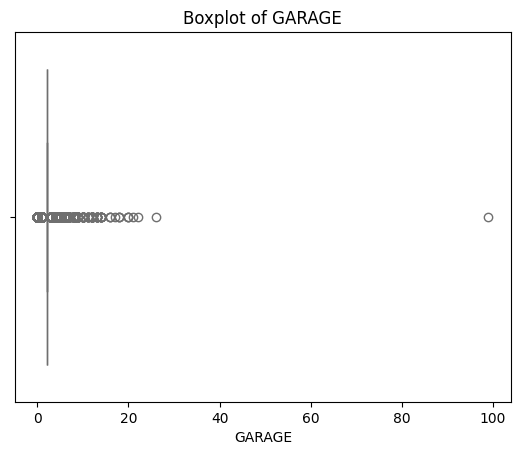

In [147]:
# Creating a boxplot visualization
sns.boxplot(x=X_train_capped['GARAGE'], color='skyblue', orient='v')
plt.title(f'Boxplot of GARAGE')
plt.ylabel('')

**Insight:**
Based on the provided data, it's evident that the values of the lower and upper boundaries for the 'garage' feature are identical. This observation is complemented by the box plot, indicating an extremely narrow quartile range (Q1-Q3), implying low skewness and high kurtosis within this garage data. Consequently, we'll consider the data in the 'garage' feature as invalid, potentially due to misinformation during the data collection process. For instance, individuals residing in apartments may not have personal garages since it's a public facility. Consequently, the 'garage' feature will be excluded from the dataset to prepare for model construction.

In [151]:
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26924 entries, 23299 to 14100
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            26924 non-null  object 
 1   BEDROOMS          26924 non-null  float64
 2   GARAGE            26924 non-null  float64
 3   LAND_AREA         26924 non-null  float64
 4   CBD_DIST          26924 non-null  int64  
 5   NEAREST_STN       26924 non-null  object 
 6   NEAREST_SCH       26924 non-null  object 
 7   NEAREST_SCH_RANK  26924 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 1.7+ MB


In [152]:
X_test_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6732 entries, 21569 to 25374
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            6732 non-null   object 
 1   BEDROOMS          6732 non-null   float64
 2   GARAGE            6732 non-null   float64
 3   LAND_AREA         6732 non-null   float64
 4   CBD_DIST          6732 non-null   int64  
 5   NEAREST_STN       6732 non-null   object 
 6   NEAREST_SCH       6732 non-null   object 
 7   NEAREST_SCH_RANK  6732 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 447.0+ KB


In [153]:
# Initiating the process of dropping the garage column from the dataset
X_train_capped.drop(['GARAGE'], axis=1, inplace=True)
X_test_capped.drop(['GARAGE'], axis=1, inplace=True)
X_train_capped # Displaying the updated dataset

SUBURB  BEDROOMS  LAND_AREA  CBD_DIST          NEAREST_STN  \
23299        Kenwick       4.0     1351.5     14300      Kenwick Station   
7347       Mundaring       4.0     1351.5     30700      Midland Station   
16353   Port Kennedy       4.0      726.0     47300      Warnbro Station   
8702        Jolimont       4.0      466.0      4600      Daglish Station   
26909       Jindalee       4.0      659.0     36700       Butler Station   
...              ...       ...        ...       ...                  ...   
19183      Two Rocks       3.0      810.0     49700       Butler Station   
4180        Armadale       3.0      701.0     24900     Sherwood Station   
25773     Kensington       2.0      506.0      4100  Claisebrook Station   
3491   Seville Grove       4.0      710.0     24000     Sherwood Station   
14100       Carramar       4.0      601.0     27600   Currambine Station   

                          NEAREST_SCH  NEAREST_SCH_RANK  
23299      REHOBOTH CHRISTIAN COLLEGE                73  
7347      MUNDARING CHRISTIAN COLLEGE                73  
16353   WARNBRO COMMUNITY HIGH SCHOOL                73  
8702                  SHENTON COLLEGE                14  
26909                  BUTLER COLLEGE                39  
...                               ...               ...  
19183       YANCHEP SECONDARY COLLEGE                73  
4180            CECIL ANDREWS COLLEGE               139  
25773                  WESLEY COLLEGE                37  
3491            CECIL ANDREWS COLLEGE               139  
14100  JOSEPH BANKS SECONDARY COLLEGE                92  

[26924 rows x 7 columns]

In [154]:
X_test_capped.columns

Index(['SUBURB', 'BEDROOMS', 'LAND_AREA', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_SCH', 'NEAREST_SCH_RANK'],
      dtype='object')

**5.3.6 Feature Scaling and Encoding**

*In this section, we will proceed the feature transformations process into feature scaling and encoding. Feature scaling will be executed using a standard scaler, while the feature encoding will be done by using the one hot encoder to enhance model interpretation.*

In [155]:
# Executing the features scaling process using the standard scaler
scaler = StandardScaler()
numeric_features = ['BEDROOMS', 'LAND_AREA', 'CBD_DIST', 'NEAREST_SCH_RANK']
numeric_transformer = scaler

In [156]:
# Initiating the one hot encoding process
encoder = OneHotEncoder(handle_unknown='ignore')

# Membuat transformer untuk kolom kategori
categorical_features = ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH']
categorical_transformer = encoder

In [157]:
# Compiling the features scaling and encoding process into column transformer process
transform = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    remainder='passthrough'  # Mengabaikan kolom lainnya
)

In [158]:
transform # Displaying the column transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['BEDROOMS', 'LAND_AREA', 'CBD_DIST',
                                  'NEAREST_SCH_RANK']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['SUBURB', 'NEAREST_STN', 'NEAREST_SCH'])])

# VI. Model Definition

In this project, there are five types of regression models to be used: K-Nearest Neighbors (KNN) Regressor, Support Vector Machine (SVM) Regressor, Decision Tree Regressor, Random Forest Regressor, and Adaboost Regressor. Here is the insight into why these models were selected:

1. **K-Nearest Neighbors (KNN) Regression:**
   - KNN is a non-parametric model, meaning it makes no specific assumptions about the data distribution.

2. **Support Vector Machine (SVM) Regression:**
   - SVM performs well on data with a linear tendency.
   - In some cases, SVM can deliver good performance and handle overfitting effectively.

3. **Decision Tree Regression:**
   - Decision Trees can be used when a clearer interpretation of relationships between attributes and the target is desired.
   - The Decision Tree model generates a hierarchical decision structure that is easily interpretable.
   - It is a powerful model for handling datasets containing both categorical and numerical attributes.

4. **Random Forest Regression:**
   - Random Forest is an ensemble model that uses multiple Decision Trees to enhance performance and reduce overfitting.
   - It is often chosen for its ability to handle data complexity and produce robust predictions.
   - Random Forest is robust in handling data with numerous attributes.

5. **Adaboost Regressor:**
   - Adaboost is an ensemble method that works by combining multiple weak learners to create a strong predictive model.
   - It sequentially corrects the errors of the previous model and adjusts the weight of each trained instance to emphasize the more difficult cases.

The factors explained for each model selection above encompass the rationale behind choosing these models. The dataset contains various types of attributes, both numerical and categorical, and exhibits extensive data distribution (non-centralized). These four models will be evaluated, and the best-performing model will be selected for optimization and application in this project.

**6.1 KNN Regressor Pipeline**

In [159]:
# Initiating the KNN regressor pipeline
knn_regressor = KNeighborsRegressor(n_neighbors=5,weights='uniform',algorithm='auto',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)
knnreg_pipeline = make_pipeline(transform, knn_regressor)
knnreg_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [160]:
knnreg_pipeline.named_steps.kneighborsregressor.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**6.2 SVM Regressor Pipeline**

In [161]:
# Initiating the SVM regressor model
svm_regressor = SVR(kernel='rbf',degree=3,gamma='scale',coef0=0.0,tol=1e-3,C=1.0,epsilon=0.1,shrinking=True,cache_size=200,verbose=False,max_iter=-1)
svmreg_pipeline = make_pipeline(transform, svm_regressor)
svmreg_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('svr', SVR())])

In [163]:
svmreg_pipeline.named_steps.svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**6.3 Decision Tree Regressor Pipeline**

In [162]:
# Initiating Decision Tree regressor model
dt_regressor = DecisionTreeRegressor(criterion='squared_error',splitter='best',max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,random_state=42,max_leaf_nodes=None,min_impurity_decrease=0.0,ccp_alpha = 0.0 )
dtreg_pipeline = make_pipeline(transform, dt_regressor)
dtreg_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [164]:
dtreg_pipeline.named_steps.decisiontreeregressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

**6.4 Random Forest Regressor Pipeline**

In [165]:
# Initiating the Random Forest regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, criterion = 'squared_error',max_depth=None, min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = 1.0, max_leaf_nodes = None, min_impurity_decrease = 0.0, bootstrap = True, oob_score = False, n_jobs = None, random_state=42, verbose = 0, warm_start = False, ccp_alpha = 0.0, max_samples = None)
rfreg_pipeline = make_pipeline(transform, rf_regressor)
rfreg_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [166]:
rfreg_pipeline.named_steps['randomforestregressor'].get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

**6.5 Adaboosting Regressor Pipeline**

In [167]:
# Initiating the adaboost regressor model
adaboost_regressor = AdaBoostRegressor(estimator=None, n_estimators = 50, learning_rate = 1.0, loss = 'linear', random_state = None, base_estimator = None)
adaboostreg_pipeline = make_pipeline(transform, adaboost_regressor)
adaboostreg_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('adaboostregressor', AdaBoostRegressor(base_estimator=None))])

In [168]:
adaboostreg_pipeline.named_steps['adaboostregressor'].get_params()

{'base_estimator': None,
 'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

# VII. Model Training

**7.1 Training KNN Regressor Model**

In [169]:
knnreg_pipeline.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('kneighborsregressor', KNeighborsRegressor())])

**7.2 Training SVM Regressor Model**

In [170]:
svmreg_pipeline.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('svr', SVR())])

**7.3 Training Decision Tree Regressor Model**

In [171]:
dtreg_pipeline.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

**7.4 Random Forest Regressor Model**

In [172]:
rfreg_pipeline.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [173]:
adaboostreg_pipeline.fit(X_train_capped,y_train)

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('adaboostregressor', AdaBoostRegressor(base_estimator=None))])

# VIII. Model Evaluation

**8.1 Pipeline Model Evaluation**

In this model evaluation process, two evaluation metrics will be used: MAE and R^2.

- **Mean Absolute Error (MAE)** provides a measure of how close the price predictions are to the actual prices (how minimal the error is). One advantage of using MAE is its robustness to residual outliers.
- **R-squared (R^2)** provides an indication of how well the price variability can be explained by the model. R^2 is suitable for cases where even the smallest level of error is a concern. Additionally, this metric is advantageous as it's easier to interpret and explain compared to Mean Squared Error (MSE).

By using MAE and R^2 together, the resulting evaluation is expected to provide insights into how well the models used predict property prices. MAE will offer an average error measure, while R^2 will depict how much of the variability in the data can be explained by the model, with R^2 values ranging between 0 and 1, where closer to 1 indicates a better model fit.

**8.1.1 Model Evaluation by Mean Absolute Error (MAE) Cross Validations**

In [178]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define regression-specific scoring functions
custom_mae_scorer = make_scorer(mean_absolute_error)

# Checking cross-validation score
cv_knn_model = cross_val_score(knnreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_mae_scorer)
cv_svm_model = cross_val_score(svmreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_mae_scorer)
cv_dt_model = cross_val_score(dtreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_mae_scorer)
cv_rf_model = cross_val_score(rfreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_mae_scorer)
cv_ab_model = cross_val_score(adaboostreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_mae_scorer)

cv_scores = float('inf')
name_model = ""

for cv, name in zip(
    [cv_knn_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_ab_model],
    ["knn", "svm", "dt", "rf", "ab"],
):
    print(name)
    print("MAE - All - Cross Validation  : ", cv)
    print("MAE - Mean - Cross Validation : ", cv.mean())
    print("MAE - Std - Cross Validation  : ", cv.std())
    print("MAE - Range of Test-Set       : ", (cv.mean() - cv.std()), "-", (cv.mean() + cv.std()))
    print("-" * 50)

    if cv.mean() < cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

print("Best model:", name_model)
print("Cross-val mean MAE:", cv_scores)

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

knn
MAE - All - Cross Validation  :  [125621.0464624  124339.90362117 122989.53920149 120657.86050139
 123845.80159733]
MAE - Mean - Cross Validation :  123490.83027675384
MAE - Std - Cross Validation  :  1652.9828595874299
MAE - Range of Test-Set       :  121837.84741716641 - 125143.81313634127
--------------------------------------------------
svm
MAE - All - Cross Validation  :  [247362.5781335  242794.83026133 249885.6145621  234461.16335714
 241850.94640419]
MAE - Mean - Cross Validation :  243271.0265436493
MAE - Std - Cross Validation  :  5298.125119947662
MAE - Range of Test-Set       :  237972.90142370164 - 248569.15166359695
--------------------------------------------------
dt
MAE - All - Cross Validation  :  [149349.86096197 155690.71316502 153655.90406626 154819.60087103
 156782.02603393]
MAE - Mean - Cross Validation :  154059.62101964242
MAE - Std - Cross Validation  :  2568.8264714577813
MAE - Range of Test-Set       :  151490.79454818464 - 156628.4474911002
-----------

**Insight :**

The cross-validation results indicate the Mean Absolute Error (MAE) and its variation across the different models applied to predict property prices. Here are the insights from the data:

1. **K-Nearest Neighbors (KNN) Regression**:
   - Mean MAE: 123,490.83
   - Standard deviation: 1,652.98
   - The range of the test-set error values: 121,837.85 - 125,143.81
   - This model performs relatively consistently, with a moderate MAE but limited variability in errors.

2. **Support Vector Machine (SVM) Regression**:
   - Mean MAE: 243,271.03
   - Standard deviation: 5,298.13
   - The range of the test-set error values: 237,972.90 - 248,569.15
   - SVM shows significantly higher MAE compared to other models and has a wider variability in errors.

3. **Decision Tree Regression**:
   - Mean MAE: 154,059.62
   - Standard deviation: 2,568.83
   - The range of the test-set error values: 151,490.79 - 156,628.45
   - This model has moderate performance, with a slightly higher MAE compared to others and relatively moderate variability.

4. **Random Forest Regression**:
   - Mean MAE: 123,379.85
   - Standard deviation: 989.48
   - The range of the test-set error values: 122,390.37 - 124,369.33
   - The Random Forest model shows consistent and slightly better performance with lower MAE and lower variability compared to other models.

5. **Adaboost Regressor**:
   - Mean MAE: 273,975.70
   - Standard deviation: 16,070.25
   - The range of the test-set error values: 257,905.44 - 290,045.95
   - Adaboost demonstrates the highest MAE among the models, indicating it's less accurate in predictions and has considerable variability in errors.

Among the models tested, the **Random Forest Regression** emerges as the best-performing model, displaying relatively low mean absolute error and lower variability in errors compared to other models. This indicates that the Random Forest model provides more accurate predictions in estimating property prices compared to the other models tested in this evaluation.

**8.1.2 Model Evaluation by R2 Score Cross Validations**

In [180]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define regression-specific scoring functions
custom_r2_scorer = make_scorer(r2_score)

# R-squared scores
cv_r2_knn_model = cross_val_score(knnreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_r2_scorer)
cv_r2_svm_model = cross_val_score(svmreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_r2_scorer)
cv_r2_dt_model = cross_val_score(dtreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_r2_scorer)
cv_r2_rf_model = cross_val_score(rfreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_r2_scorer)
cv_r2_ab_model = cross_val_score(adaboostreg_pipeline, X_train_capped, y_train, cv=kfold, scoring=custom_r2_scorer)

name_r2_model = []
cv_r2_scores = 0

for cv_r2, name in zip(
    [cv_r2_knn_model, cv_r2_svm_model, cv_r2_dt_model, cv_r2_rf_model, cv_r2_ab_model],
    ["knn", "svm", "dt", "rf", "ab"],
):
    print(name)
    print("R2 - All - Cross Validation  : ", cv_r2)
    print("R2 - Mean - Cross Validation : ", cv_r2.mean())
    print("R2 - Std - Cross Validation  : ", cv_r2.std())
    print("R2 - Range of Test-Set       : ", (cv_r2.mean() - cv_r2.std()), "-", (cv_r2.mean() + cv_r2.std()))
    print("-" * 50)

    if cv_r2.mean() > cv_r2_scores:
        cv_r2_scores = cv_r2.mean()
        name_r2_model = name
    else:
        pass

print("Best model based on R2:", name_r2_model)
print("Cross-val mean R2:", cv_r2_scores)

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

knn
R2 - All - Cross Validation  :  [0.68957959 0.69283178 0.71147187 0.67274832 0.68034858]
R2 - Mean - Cross Validation :  0.6893960272868144
R2 - Std - Cross Validation  :  0.013101016366367929
R2 - Range of Test-Set       :  0.6762950109204464 - 0.7024970436531823
--------------------------------------------------
svm
R2 - All - Cross Validation  :  [-0.0828049  -0.07562132 -0.08744091 -0.07569092 -0.07157789]
R2 - Mean - Cross Validation :  -0.07862718943307918
R2 - Std - Cross Validation  :  0.005700602621915926
R2 - Range of Test-Set       :  -0.0843277920549951 - -0.07292658681116326
--------------------------------------------------
dt
R2 - All - Cross Validation  :  [0.56985922 0.4879707  0.54495599 0.44526999 0.46355481]
R2 - Mean - Cross Validation :  0.5023221422549297
R2 - Std - Cross Validation  :  0.04762923250384438
R2 - Range of Test-Set       :  0.4546929097510853 - 0.5499513747587741
--------------------------------------------------
rf
R2 - All - Cross Validation  

**Insights :**

The results of R-squared (R2) across different regression models used for property price prediction provide insights into their predictive performance:

1. **K-Nearest Neighbors (KNN) Regression**:
   - Mean R2: 0.689
   - Standard deviation: 0.013
   - The range of R2 scores: 0.676 - 0.702
   - KNN regression shows a moderate predictive performance with a consistent R2 score and low variability.

2. **Support Vector Machine (SVM) Regression**:
   - Mean R2: -0.079
   - Standard deviation: 0.005
   - The range of R2 scores: -0.084 - -0.073
   - SVM regression exhibits poor predictive ability with negative R2 scores, indicating it performs worse than a simple mean model.

3. **Decision Tree Regression**:
   - Mean R2: 0.502
   - Standard deviation: 0.048
   - The range of R2 scores: 0.455 - 0.550
   - Decision Tree regression shows moderate performance but relatively higher variability compared to other models.

4. **Random Forest Regression**:
   - Mean R2: 0.684
   - Standard deviation: 0.020
   - The range of R2 scores: 0.664 - 0.704
   - Random Forest regression demonstrates a relatively good predictive performance with a consistent R2 score and low variability.

5. **Adaboost Regressor**:
   - Mean R2: 0.178
   - Standard deviation: 0.122
   - The range of R2 scores: 0.056 - 0.301
   - Adaboost regression indicates relatively weak predictive performance with higher variability in R2 scores.

The R-squared metric measures how well the regression models explain the variance in the target variable. Based on R2 scores, the **K-Nearest Neighbors (KNN)** model emerges as the best-performing model, indicating a better fit to the data compared to other models tested. However, it's important to note that while KNN performs the best among these models according to R2 scores, a comprehensive evaluation using multiple metrics is advisable for a more robust model assessment.

**Model Evaluation Insights :**

The evaluations using Mean Absolute Error (MAE) and R-squared (R2) metrics unveil that different algorithms showcase varying performances. The Random Forest Regressor and K-Nearest Neighbors (KNN) Regressor emerge as the top-performing models based on these distinct evaluation criteria. However, they stand out for different reasons:

1. **Random Forest Regression**:
   - R2: 0.684 (Mean), MAE: 123,379.85
   - Displays robust performance in both metrics with a moderate R2 score and relatively low MAE, indicating consistent and accurate predictions compared to other models.

2. **K-Nearest Neighbors (KNN) Regression**:
   - R2: 0.689 (Mean), MAE: 123,490.83
   - Demonstrates slightly better R2 and a close MAE score to Random Forest, portraying stable and reliable predictive ability.

As these evaluations using different metrics suggest varying algorithm performances, the next step involves hyperparameter tuning for both the Random Forest Regressor and K-Nearest Neighbors (KNN) Regressor. By fine-tuning these models, the aim is to optimize their performance further and obtain the best-performing model for subsequent evaluations.

**8.2 Hyperparameter Tuning**

*In this phase, grid search will be employed to discover the best combination of hyperparameters for the two utilized models, namely KNN Regressor and Random Forest Regressor.*

**8.2.1 KNN Regressor Model Tuning**

The parameters to be varied are:

**n_neighbors**: Modifying the number of neighbors/points to be learned/compared.

**weights**: Adjusting the variable weights by specifying 'uniform' and 'distance' values.
- 'uniform' assigns equal weight to all neighbors.
- 'distance' gives greater weight to closer neighbors, aiding the model in being more sensitive to nearby data.

**metric**: I am retaining two distance metrics, namely 'euclidean' and 'manhattan', commonly used in KNN.

With these modifications, we will execute GridSearchCV to explore the best combination of hyperparameters that suits this dataset.

In [181]:
grid_search_params_knn = {
    'kneighborsregressor__n_neighbors': [2, 5, 8, 11, 14, 17, 20, 23],  # Varying the number of neighbors in the model tuning
    'kneighborsregressor__weights': ['uniform', 'distance'],  # Adding weights to observe the effects of uniform and distance weights
    'kneighborsregressor__metric': ['euclidean', 'manhattan']  # Adding metric variations, using both euclidean and manhattan
}

grid_knn = GridSearchCV(knnreg_pipeline, grid_search_params_knn, cv=3, n_jobs=-1, verbose=3, scoring='r2')  # Initializing grid search in the tuning process
grid_knn.fit(X_train_capped, y_train)  # Fitting for grid search

# Print the best parameters
print("Best KNN parameters:", grid_knn.best_params_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best KNN parameters: {'kneighborsregressor__metric': 'euclidean', 'kneighborsregressor__n_neighbors': 14, 'kneighborsregressor__weights': 'uniform'}


In [182]:
# Displaying the best estimator
# Creating a new Pipeline with the best parameters from GridSearch

best_estimator_knn = grid_knn.best_estimator_
best_estimator_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(metric='euclidean', n_neighbors=14))])

In [183]:
# Displaying the steps

best_estimator_knn.named_steps['kneighborsregressor']

KNeighborsRegressor(metric='euclidean', n_neighbors=14)

**Evaluating the Fine Tuned KNN Regressor**

In [185]:
# Evaluating the fine tuned results
best_estimator_knn_predict_train = best_estimator_knn.predict(X_train_capped)
best_estimator_knn_predict_test = best_estimator_knn.predict(X_test_capped)
# Calculating the R2
r2_train_knnreg_tune = r2_score(y_train, best_estimator_knn_predict_train)
r2_test_knnreg_tune = r2_score(y_test, best_estimator_knn_predict_test)
# Calculating the MAE
MAE_train_knnreg_tune = mean_absolute_error(y_train, best_estimator_knn_predict_train)
MAE_test_knnreg_tune = mean_absolute_error(y_test, best_estimator_knn_predict_test)
# Displaying the R2 Score
print('R-squared - Fine Tuned KNN Regressor Data Train Evaluations :', r2_train_knnreg_tune)
print('R-squared - Fine Tuned KNN Regressor Data Test Evaluations :', r2_test_knnreg_tune)
# Displaying the MAE Score
print('MAE - Fine Tuned KNN Regressor Data Train Evaluations :', MAE_train_knnreg_tune)
print('MAE - Fine Tuned KNN Regressor Data Test Evaluations :', MAE_test_knnreg_tune)

R-squared - Fine Tuned KNN Regressor Data Train Evaluations : 0.7493165153972603
R-squared - Fine Tuned KNN Regressor Data Test Evaluations : 0.7297743923450453
MAE - Fine Tuned KNN Regressor Data Train Evaluations : 111878.84286191821
MAE - Fine Tuned KNN Regressor Data Test Evaluations : 116587.61570537306


**8.2.2 Hyperparameter Tuning Random Forest Regressor Model**

**Parameters to be varied:**

**n_estimators:** The number of decision trees in the Random Forest ensemble. Testing various values helps determine the optimal number of trees needed for best performance. Higher values can yield a stronger model but also require more computational time.

**max_depth:** The maximum depth of each tree in the ensemble. Testing different values allows controlling the model's complexity.
- Setting it to None allows the tree to grow to the maximum possible depth. Limiting the depth can help prevent overfitting.

**min_samples_split:** The minimum number of samples required to split a node in the tree. Changing this value can affect how much the trees split nodes, influencing the model's complexity.

**min_samples_leaf:** The minimum number of samples required in a leaf node of the tree. Modifying this value can affect the number of leaf nodes in the tree and, thus, the model's complexity.

**max_features:** This parameter denotes the number of features considered when looking for the best split. Exploring various options helps understand if limiting the number of features can improve the model's generalization.

These modifications enable a broader hyperparameter search and assist in determining the best combination of hyperparameters suitable for the characteristics of the dataset at hand.

In [186]:
# Defining the varying parameters
grid_search_params_rf = {
    'randomforestregressor__n_estimators': [100, 125, 175], # Varying the n_estimator
    'randomforestregressor__max_depth': [None, 10, 20], # Varying the max_depth
    'randomforestregressor__min_samples_split': [5, 10], # Varying the minimum samples split 
    'randomforestregressor__min_samples_leaf': [1, 4], # Varying the minimum samples leaf
    'randomforestregressor__max_features': ['sqrt', 'log2']} # Varying the max features parameter
grid_rf = GridSearchCV(rfreg_pipeline, grid_search_params_rf, cv=3, n_jobs=-1, verbose=3,scoring='r2')
grid_rf.fit(X_train_capped,y_train)
# Print the best parameter
print("Parameter terbaik Random Forest:", grid_rf.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


Parameter terbaik Random Forest: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__n_estimators': 175}


In [187]:
# Print the best parameter
# Creating a new Pipeline with the best parameters from GridSearch

best_estimator_rf = grid_rf.best_estimator_
best_estimator_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['BEDROOMS', 'LAND_AREA',
                                                   'CBD_DIST',
                                                   'NEAREST_SCH_RANK']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SUBURB', 'NEAREST_STN',
                                                   'NEAREST_SCH'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt',
                                       min_samples_split=10, n_estimators=175,
                                       random_state=42))])

In [188]:
# Print the steps

best_estimator_rf.named_steps['randomforestregressor']

RandomForestRegressor(max_features='sqrt', min_samples_split=10,
                      n_estimators=175, random_state=42)

In [197]:
# Evaluate the model
best_estimator_rf_predict_train = best_estimator_rf.predict(X_train_capped)
best_estimator_rf_predict_test = best_estimator_rf.predict(X_test_capped)
# Calculating the R-squared score
r2_train_rfreg_tune = r2_score(y_train, best_estimator_rf_predict_train)
r2_test_rfreg_tune = r2_score(y_test, best_estimator_rf_predict_test)
# Calculating the MAE
MAE_train_rfreg_tune = mean_absolute_error(y_train, best_estimator_rf_predict_train)
MAE_test_rfreg_tune = mean_absolute_error(y_test, best_estimator_rf_predict_test)
#Print the R-squared evaluation results
print('R-squared - Fine Tuned KNN Regressor Data Train Evaluations :', r2_train_rfreg_tune)
print('R-squared - Fine Tuned KNN Regressor Data Test Evaluations :', r2_test_rfreg_tune)
# Print the MAE Score
print('MAE - Fine Tuned KNN Regressor Data Train Evaluations :', MAE_train_rfreg_tune)
print('MAE - Fine Tuned KNN Regressor Data Test Evaluations :', MAE_test_rfreg_tune)

R-squared - Fine Tuned KNN Regressor Data Train Evaluations : 0.8371619351412302
R-squared - Fine Tuned KNN Regressor Data Test Evaluations : 0.7440700598035197
MAE - Fine Tuned KNN Regressor Data Train Evaluations : 89288.53068964145
MAE - Fine Tuned KNN Regressor Data Test Evaluations : 111917.34945988697


In [198]:
# Print the evaluation results of the tuned models

tuning_eval_summary = pd.DataFrame ({'KNN Regressor' : [r2_train_knnreg_tune,r2_test_knnreg_tune,MAE_train_knnreg_tune,MAE_test_knnreg_tune],
                              'Random Forest Regressor' : [r2_train_rfreg_tune,r2_test_rfreg_tune,MAE_train_rfreg_tune,MAE_test_rfreg_tune]},index = ['R2-train','R2-test','MAE-train','MAE-test'])
tuning_eval_summary

# Calculate deviations for R2 score and MAE score
deviation_r2_knn = r2_train_knnreg_tune - r2_test_knnreg_tune
deviation_r2_rf = r2_train_rfreg_tune - r2_test_rfreg_tune
deviation_mae_knn = MAE_train_knnreg_tune - MAE_test_knnreg_tune
deviation_mae_rf = MAE_train_rfreg_tune - MAE_test_rfreg_tune

# Create a new DataFrame for deviations
deviations_summary = pd.DataFrame({
    'KNN Regressor': [deviation_r2_knn, deviation_mae_knn],
    'Random Forest Regressor': [deviation_r2_rf, deviation_mae_rf]
}, index=['Deviation R2 Score', 'Deviation MAE Score'])

# Concatenate this new summary with the previous evaluation summary
combined_summary = pd.concat([tuning_eval_summary, deviations_summary])

combined_summary

KNN Regressor  Random Forest Regressor
R2-train                  0.749317                 0.837162
R2-test                   0.729774                 0.744070
MAE-train            111878.842862             89288.530690
MAE-test             116587.615705            111917.349460
Deviation R2 Score        0.019542                 0.093092
Deviation MAE Score   -4708.772843            -22628.818770

#### Insights:

**Evaluation Metrics:**

- **R2 Score:**
  - **KNN Regressor:** Train R2 - 0.749, Test R2 - 0.730
  - **Random Forest Regressor:** Train R2 - 0.837, Test R2 - 0.744
  - **Deviation R2 Score:**
    - KNN Regressor: 0.020
    - Random Forest Regressor: 0.093
    - (Higher deviation indicates higher overfitting tendency)

- **Mean Absolute Error (MAE):**
  - **KNN Regressor:** Train MAE - 111,879, Test MAE - 116,588
  - **Random Forest Regressor:** Train MAE - 89,289, Test MAE - 111,917
  - **Deviation MAE Score:**
    - KNN Regressor: -4,709
    - Random Forest Regressor: -22,629
    - (A lower deviation indicates a smaller difference in error between train and test sets)

#### Decision:

- **R2 Score:**
  - The **Random Forest Regressor** exhibits higher R2 scores on both train and test sets compared to the KNN Regressor. However, it's crucial to note that the KNN Regressor's test R2 score is moderately close to the Random Forest's test R2.

- **MAE:**
  - The **KNN Regressor** showcases higher MAE values on both train and test sets compared to the Random Forest Regressor. Nevertheless, the difference in the KNN's MAE between train and test sets is smaller than that of the Random Forest.

**Conclusion Supporting KNN Choice:**
- Despite having slightly lower R2 scores and higher MAE values than the Random Forest, the **KNN Regressor** demonstrates a more balanced fit. It suggests that while the Random Forest model performs marginally better on the test set, it also exhibits signs of overfitting, evident from the significantly lower error on the training set compared to the test set.
- The KNN Regressor, with its more consistent performance across train and test sets (with less overfitting tendencies), is a reasonable choice for more robust predictions, emphasizing better generalization capability and stability in prediction performance.

**Final Decision:**

Based on a preference for a more balanced fit and lower risk of overfitting, the **KNN Regressor** would be the preferred model, as it demonstrates a better compromise between performance on training and test sets, implying a more reliable and stable predictive performance in real-world scenarios.

# IX. Model Saving

*Saving the model using the Tuned KNN Regressor algorithm*

In [199]:
with open('model.pkl', 'wb') as file_1:
  pickle.dump(best_estimator_knn, file_1)

# X. Model Inference

*The inference will be done in inference.ipynb*

# XI. Conclusion

1. Factors that can affect the price of a property in Perth can be observed through the correlation level of each factor with the property price. Several factors show significant correlation with the price:
     - **SUBURB**
     - **NEAREST_STN**
     - **NEAREST_SCH**
     - **BEDROOMS**
     - **LAND_AREA**
     - **CBD_DIST**
     - **NEAREST_SCH_RANK**

2. Based on the investigation, the year of construction and the last sale year of a property do not exhibit a significant correlation that can influence property prices.

3. The location of a property has a very strong correlation with the property price. Further research reveals a segmentation of suburbs into exclusive residential areas (e.g., Dalkieth, Floreat, Watermans Bay) and more affordable areas (e.g., Merriwa, Bertram, Butler). This segmentation indicates variations in property types and available facility qualities within these suburbs. Additionally, the distance from a location to the city center strongly correlates with differences in property prices based on the property's location.

4. To conduct this project, supervised machine learning methods were employed to predict property prices based on influencing factors. The supervised machine learning models used in this project include KNN Regressor, SVM Regressor, Random Forest Regressor, Decision Tree Regressor, and Adaboosting Regressor. Based on the evaluation and tuning of models, the KNN Regressor method using independent variables **SUBURB**, **NEAREST_STN**, **NEAREST_SCH**, **BEDROOMS**, **LAND_AREA**, **CBD_DIST**, **NEAREST_SCH_RANK** demonstrates the most optimal model performance after evaluation using R-squared and MAE metrics.